# Exploratory Analysis - IOM Displacement Tracking Matrix

In [452]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import choice
from shapely.geometry import Point
import networkx as nx
import random
random.seed(10)
#import geopy
%matplotlib inline

In [453]:
d91 = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r91 = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
df = gpd.GeoDataFrame()
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()
pairs = [(Point(i.Longitude, i.Latitude), 'd') for i in d91.itertuples() ] \
            + [(Point(i.Longitude, i.Latitude), 'r') for i in r91.itertuples() ]
point = []
colour = []
for i, j in pairs:
    point.append(i), colour.append(j)
    
df['points'] = point
df['colour'] = colour
df = df.set_geometry('points')

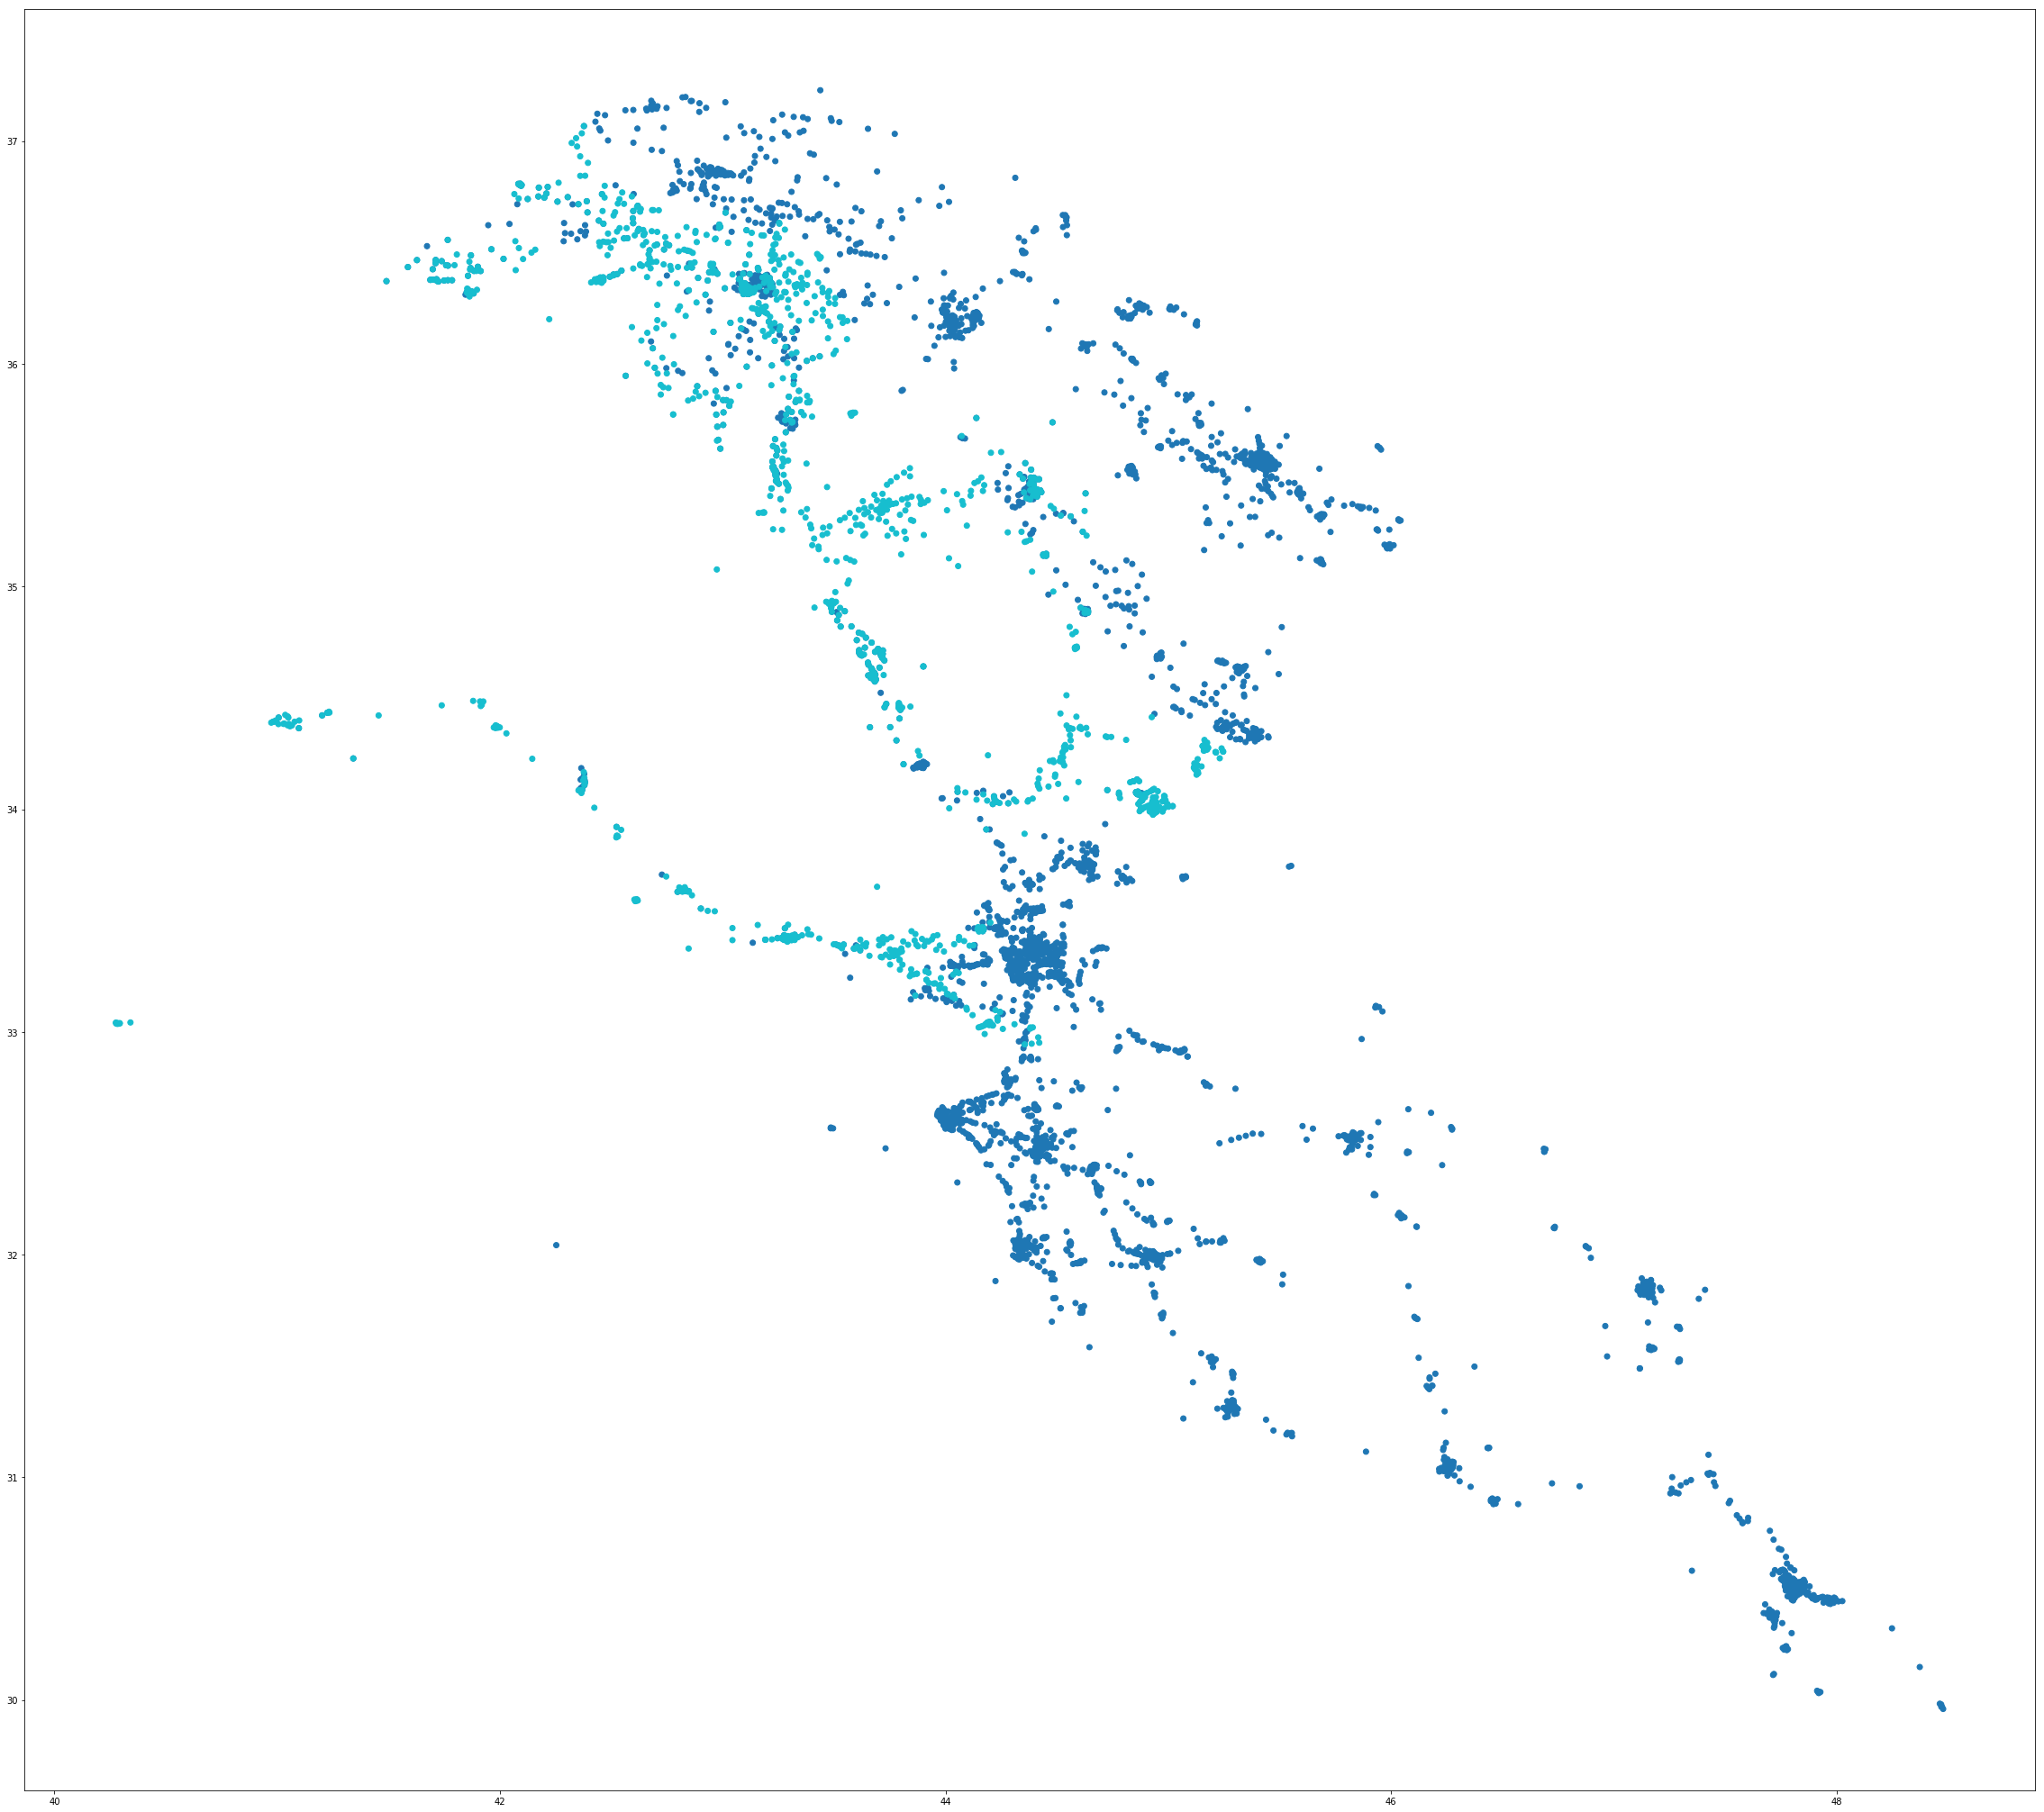

In [454]:
plt.rcParams["figure.figsize"] = (40,40)
df.plot(column='colour')

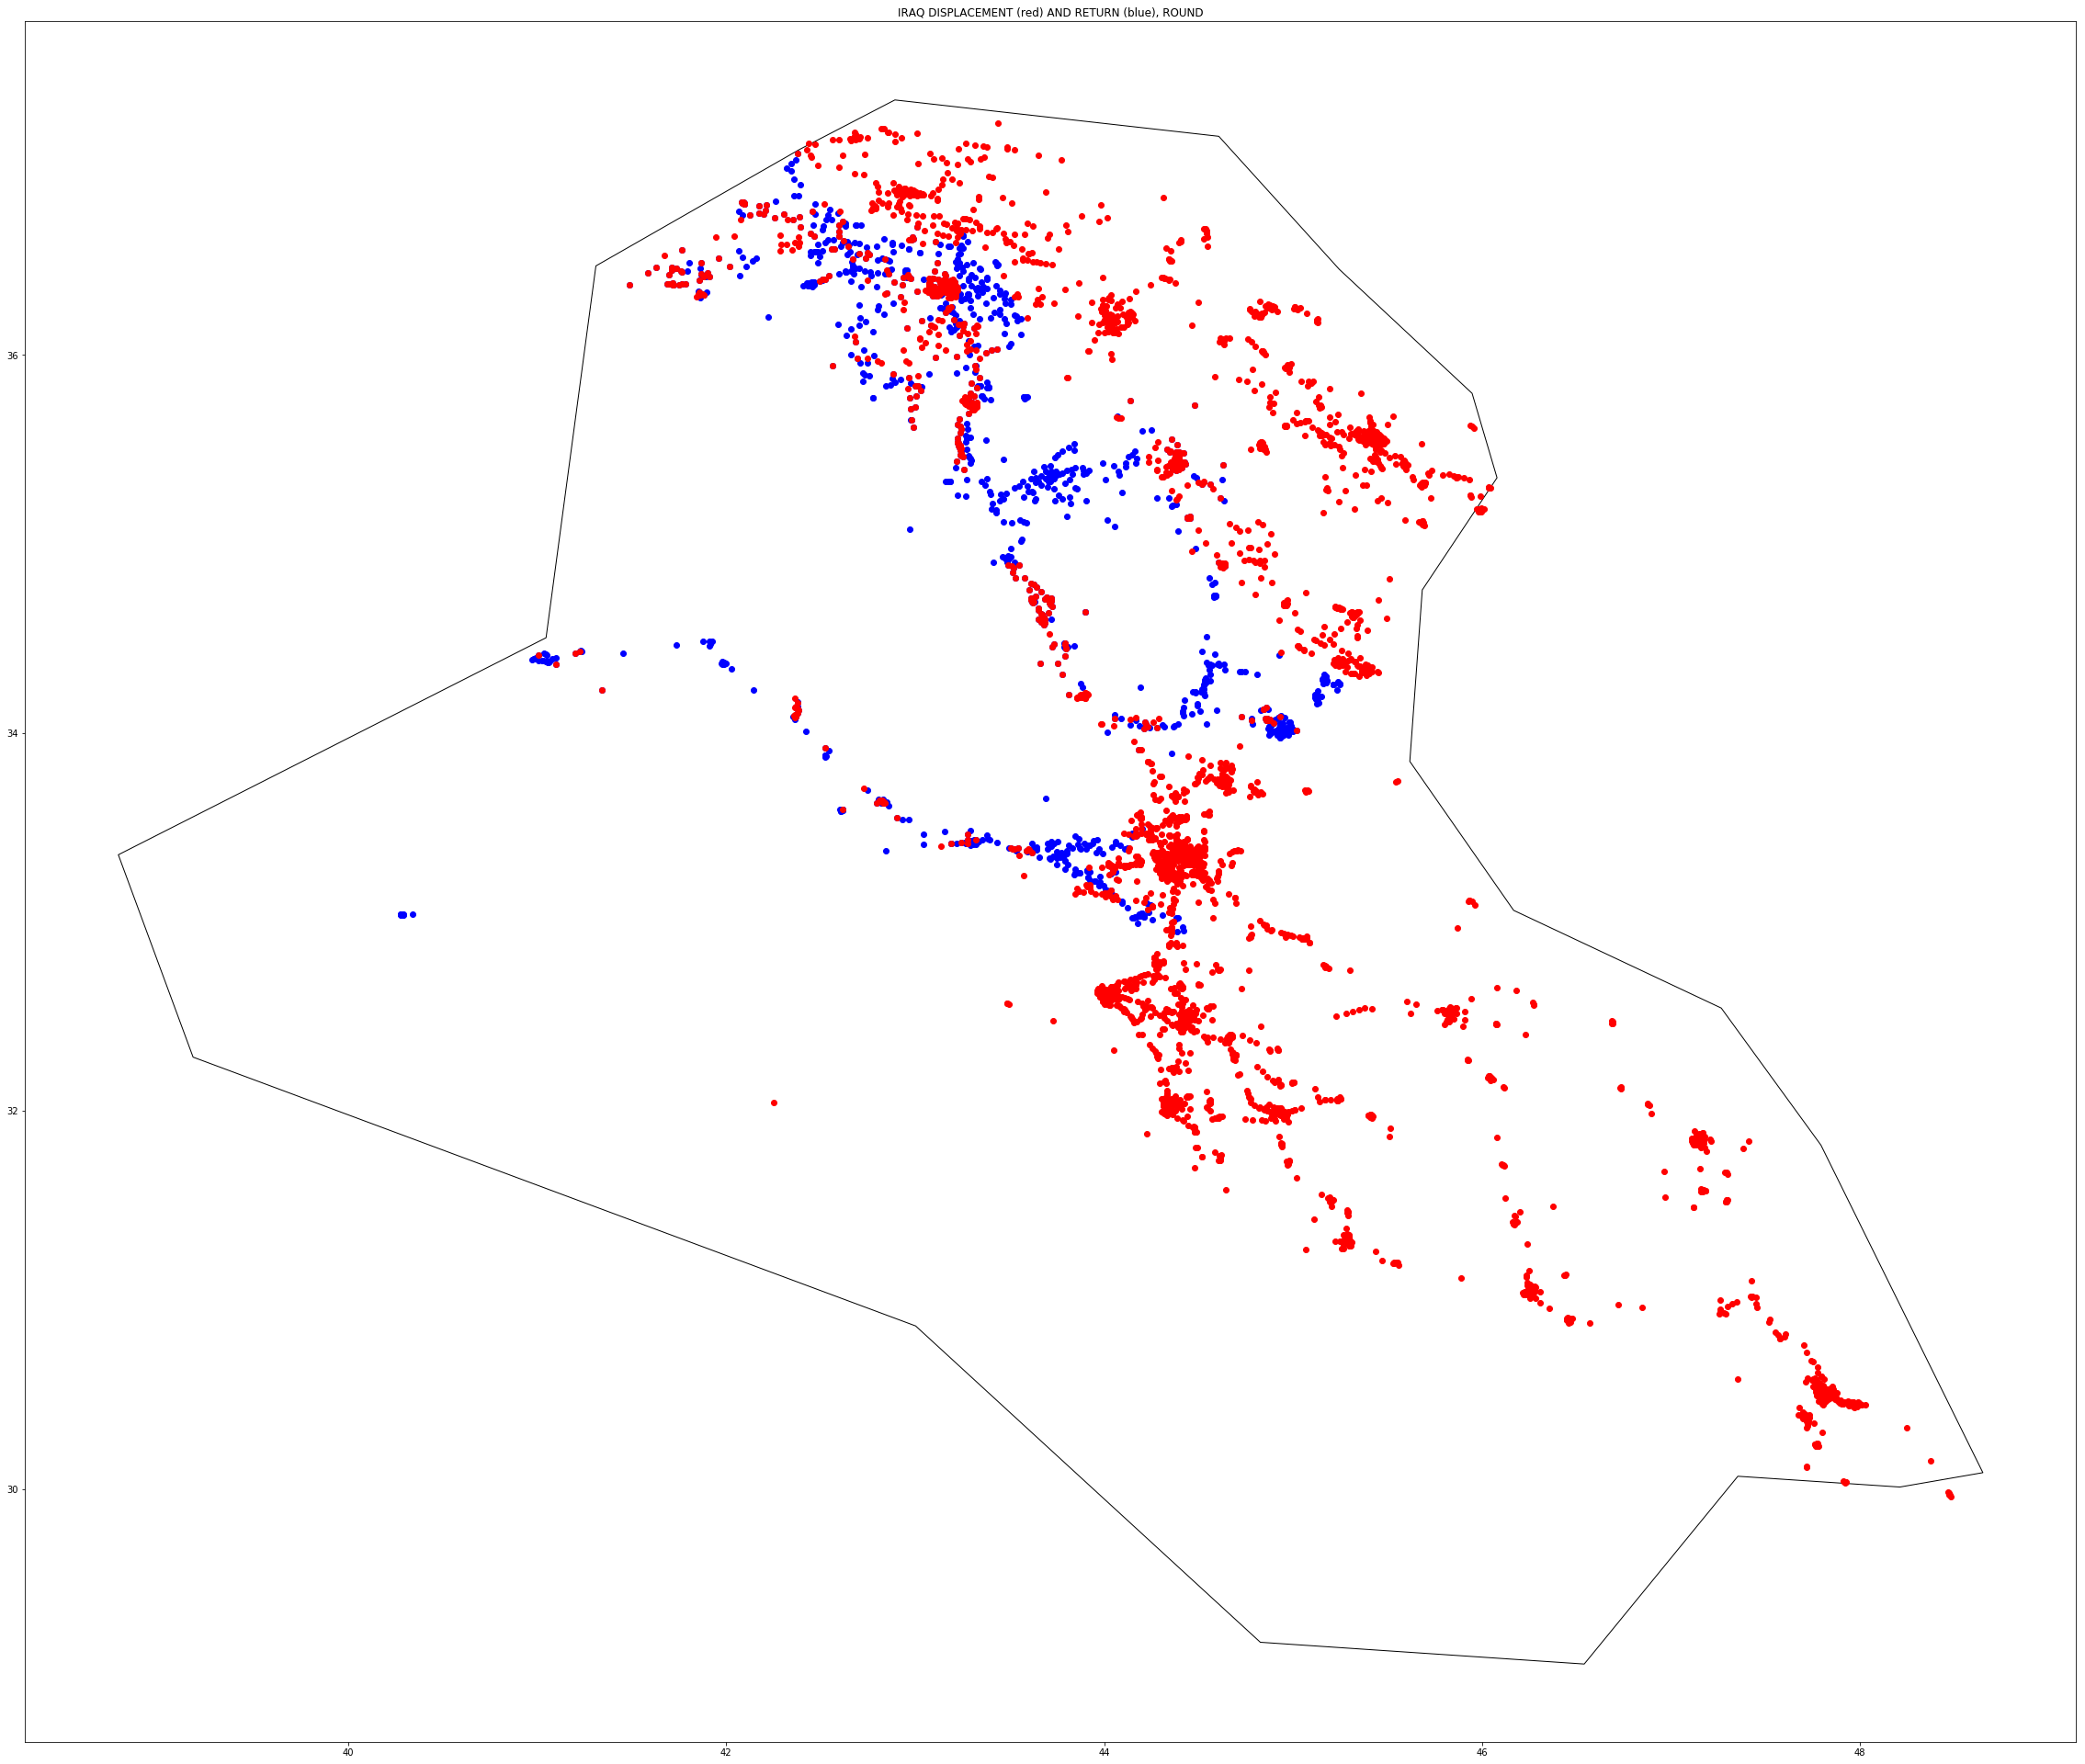

In [455]:
iraq = gpd.read_file('map.geojson')

rounds = range(1,91+1)


d = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")
dfr = gpd.GeoDataFrame()
dfd = gpd.GeoDataFrame()


dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d.itertuples() ] 
dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r.itertuples() ]
dfr = dfr.set_geometry('points')
dfr.crs = iraq.crs
dfd = dfd.set_geometry('points')
dfd.crs = iraq.crs

plt.rcParams["figure.figsize"] = (40,40)
iq = iraq.plot(color='white', edgecolor='black')
dfr.plot(ax=iq, color='blue')
dfd.plot(ax=iq, color='red')
plt.title("IRAQ DISPLACEMENT (red) AND RETURN (blue), ROUND")
plt.show();

In [456]:
d91 = pd.read_csv("data/iom_dtm_reports/csv/d91.csv")
r91 = pd.read_csv("data/iom_dtm_reports/csv/r91.csv")

def plot_map(d91, r91, name):
    dfr = gpd.GeoDataFrame()
    dfd = gpd.GeoDataFrame()

    iraq = gpd.read_file('map.geojson')
    dfd['points'] =  [Point(i.Longitude, i.Latitude) for i in d91.itertuples() ] 
    dfr['points'] =  [Point(i.Longitude, i.Latitude) for i in r91.itertuples() ]
    dfr = dfr.set_geometry('points')
    dfd = dfd.set_geometry('points')
    iraq.to_crs = {'init' :'epsg:4467'}

    base = dfr.plot(color='red')
    dfd.plot(ax=base, marker='o', color='blue');
    plt.savefig(name + ".png")

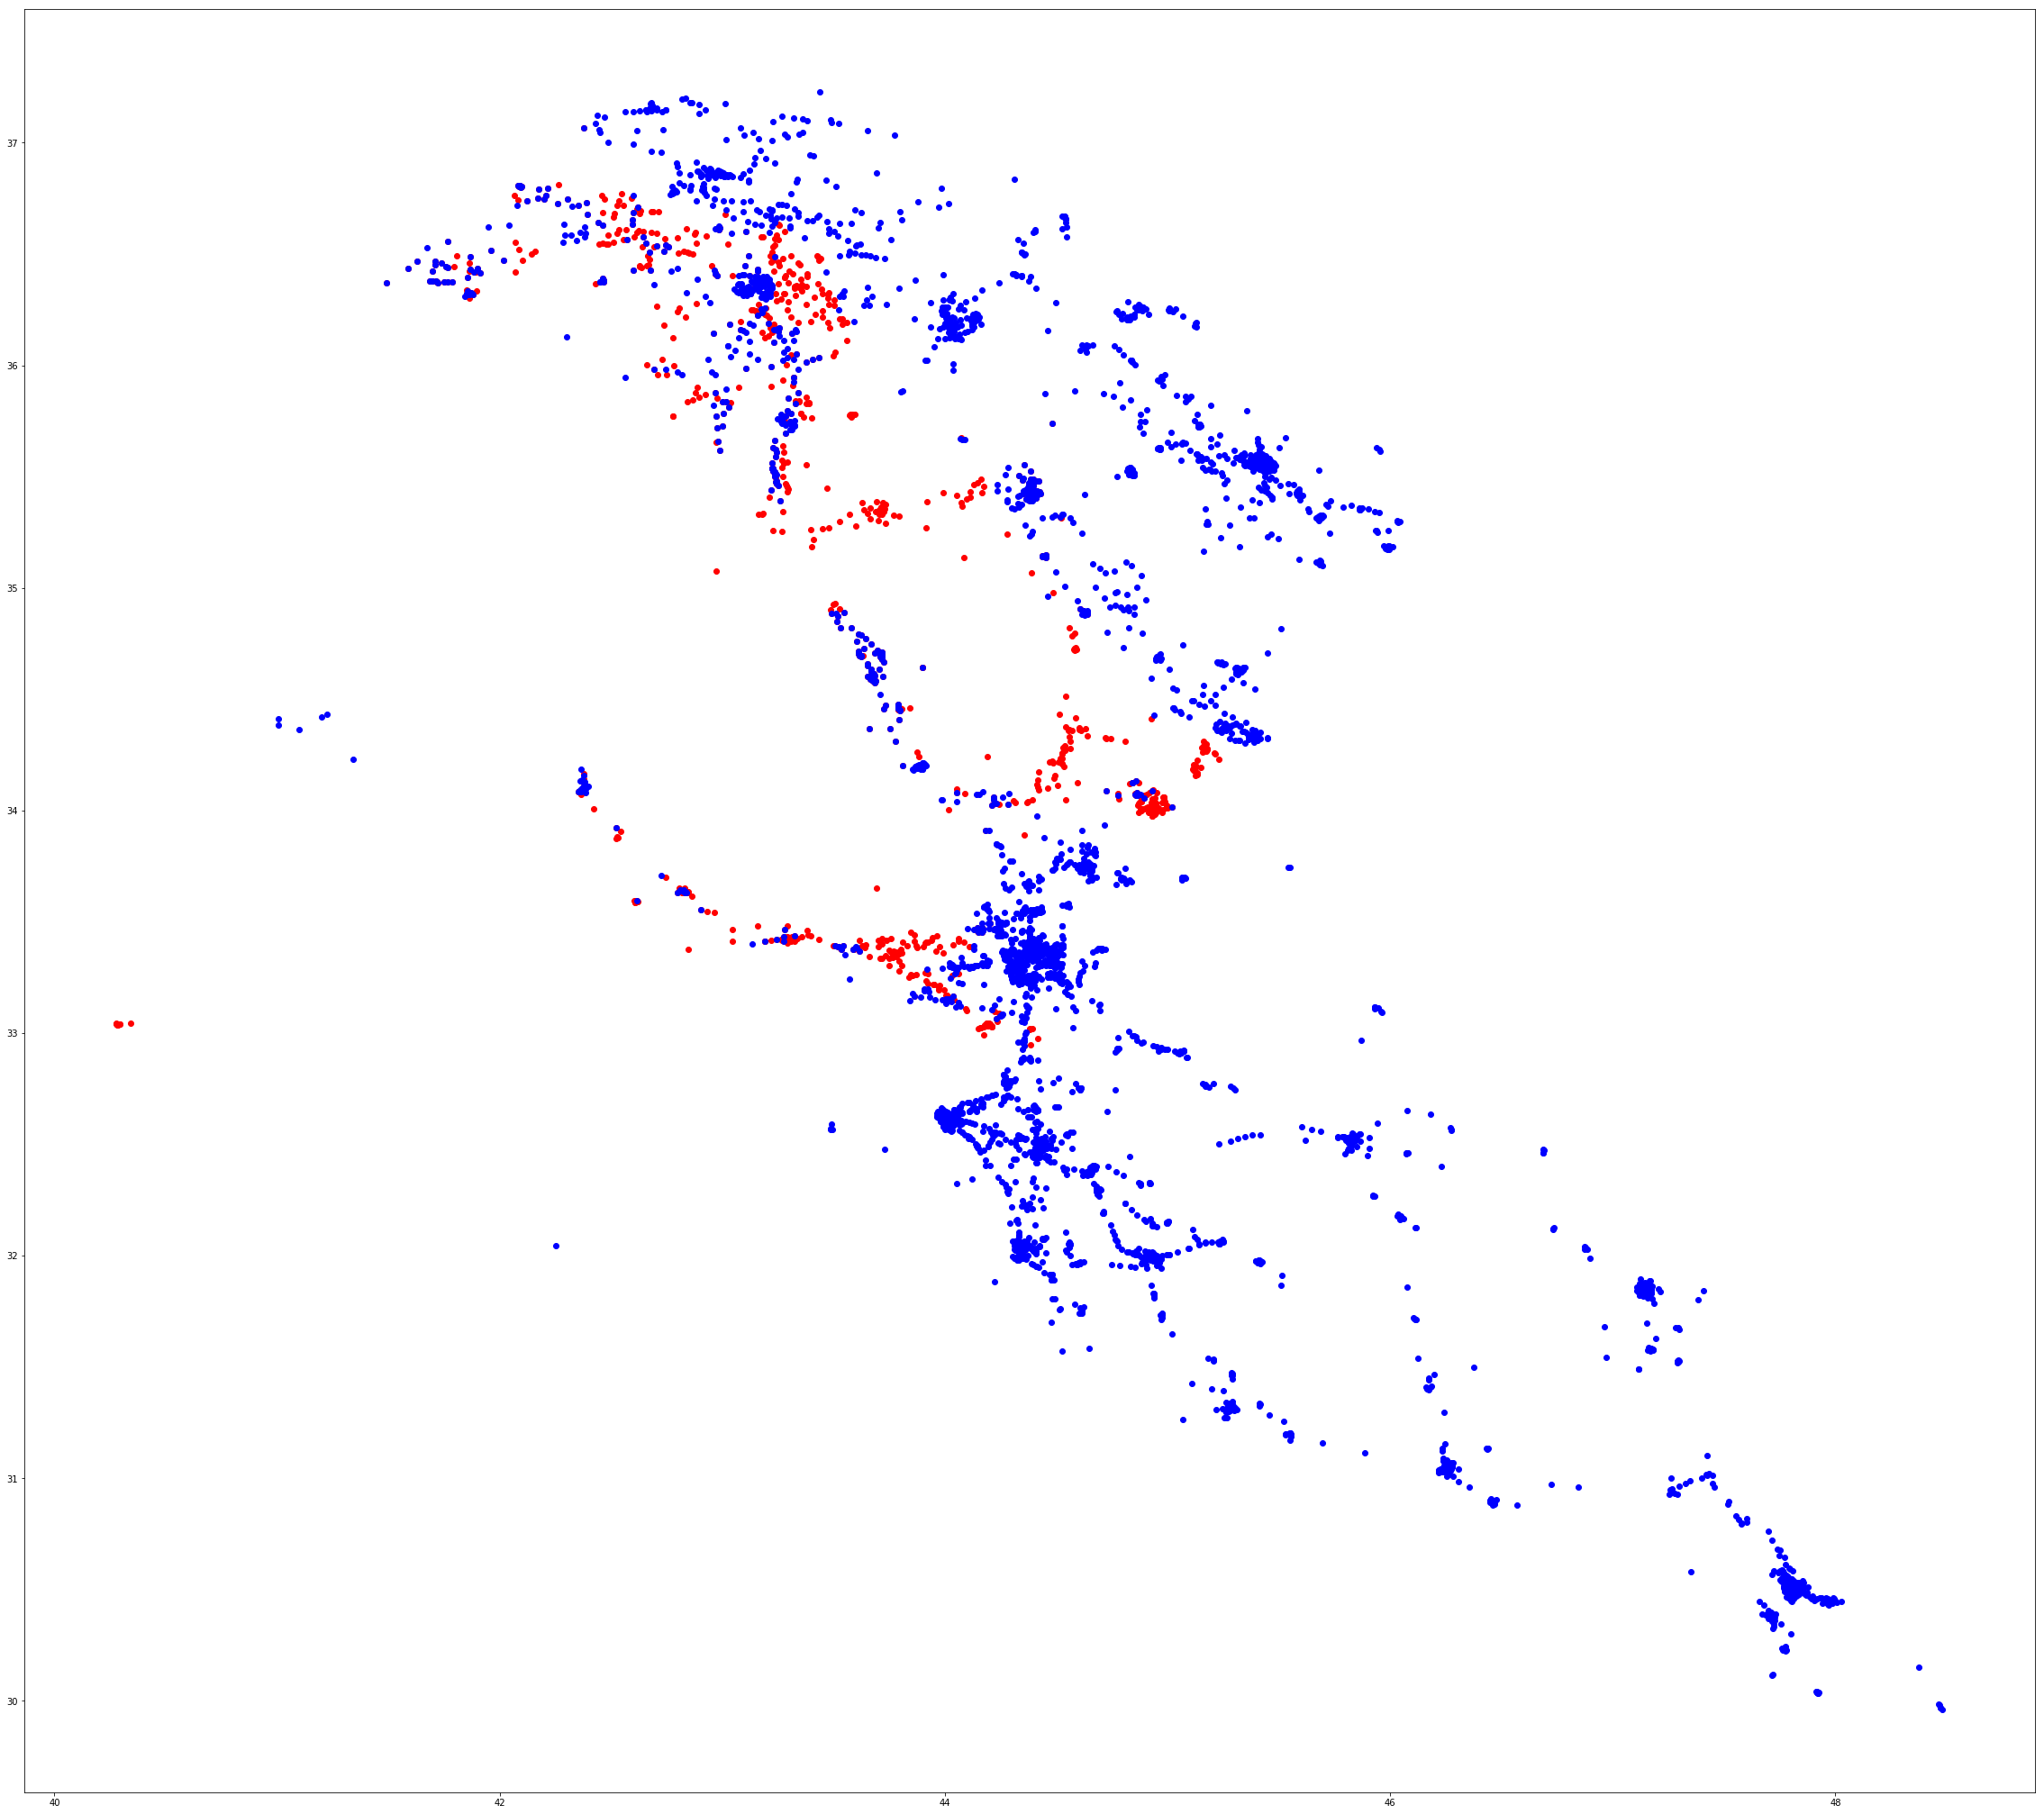

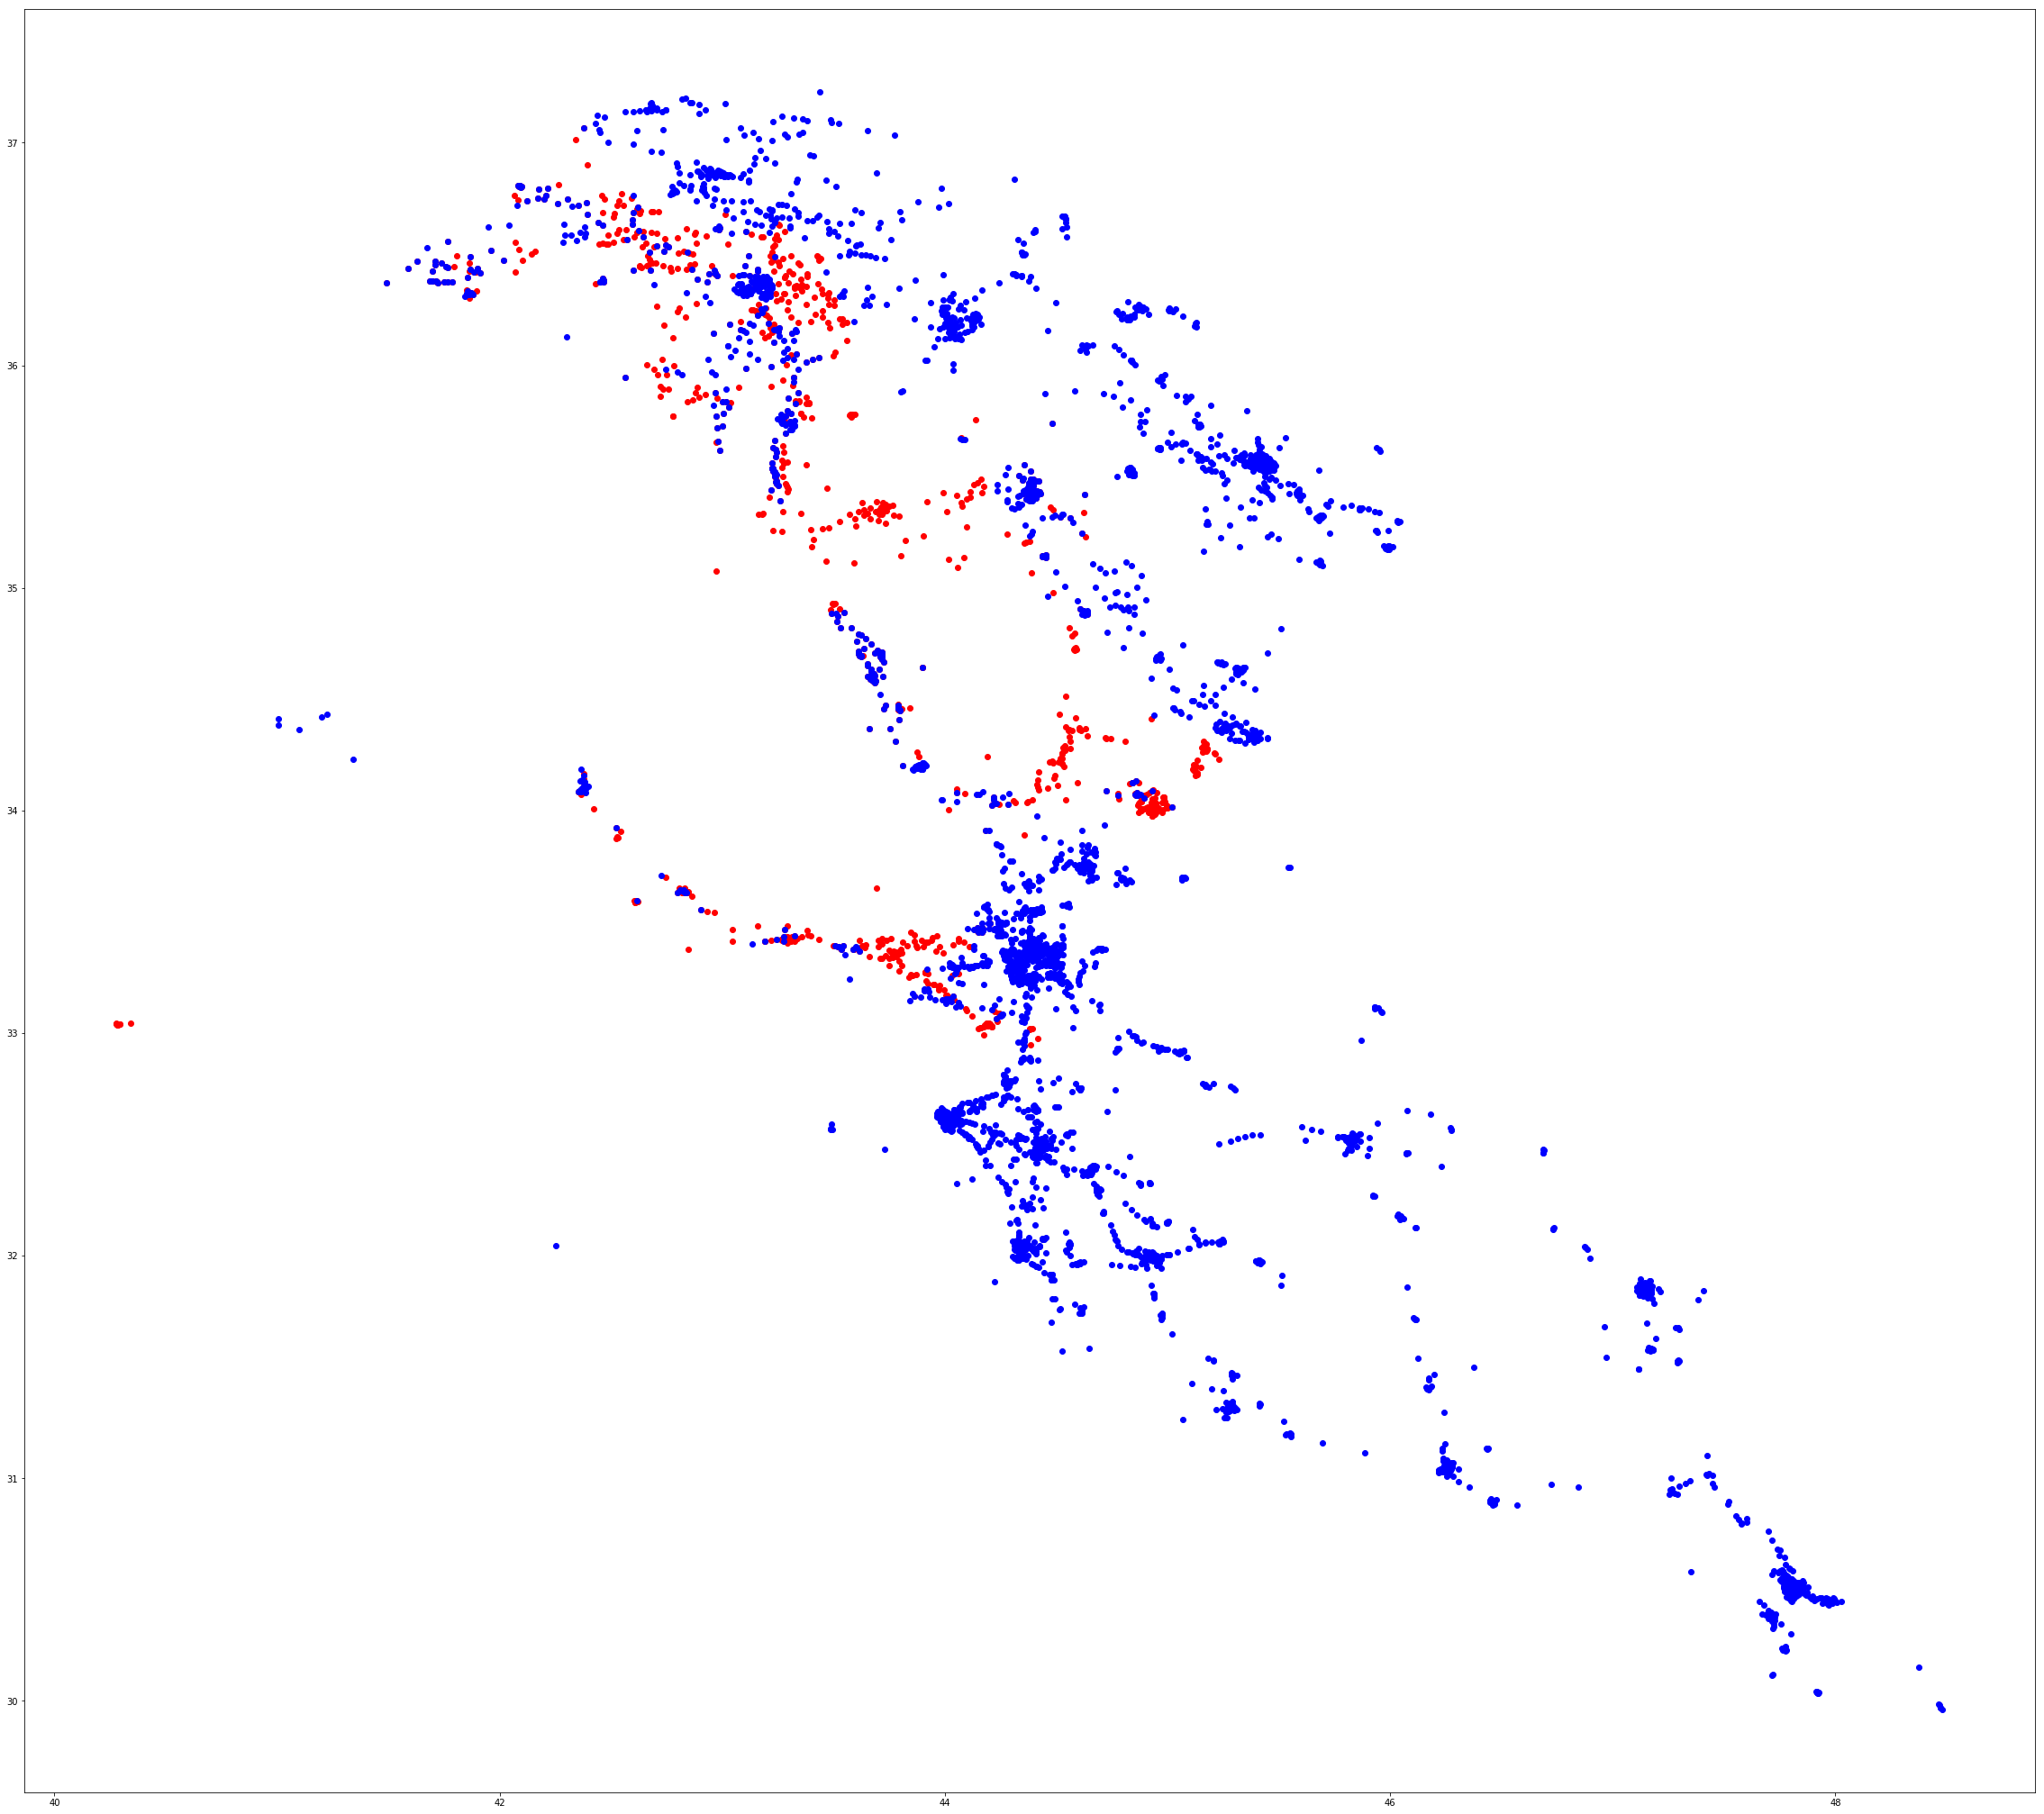

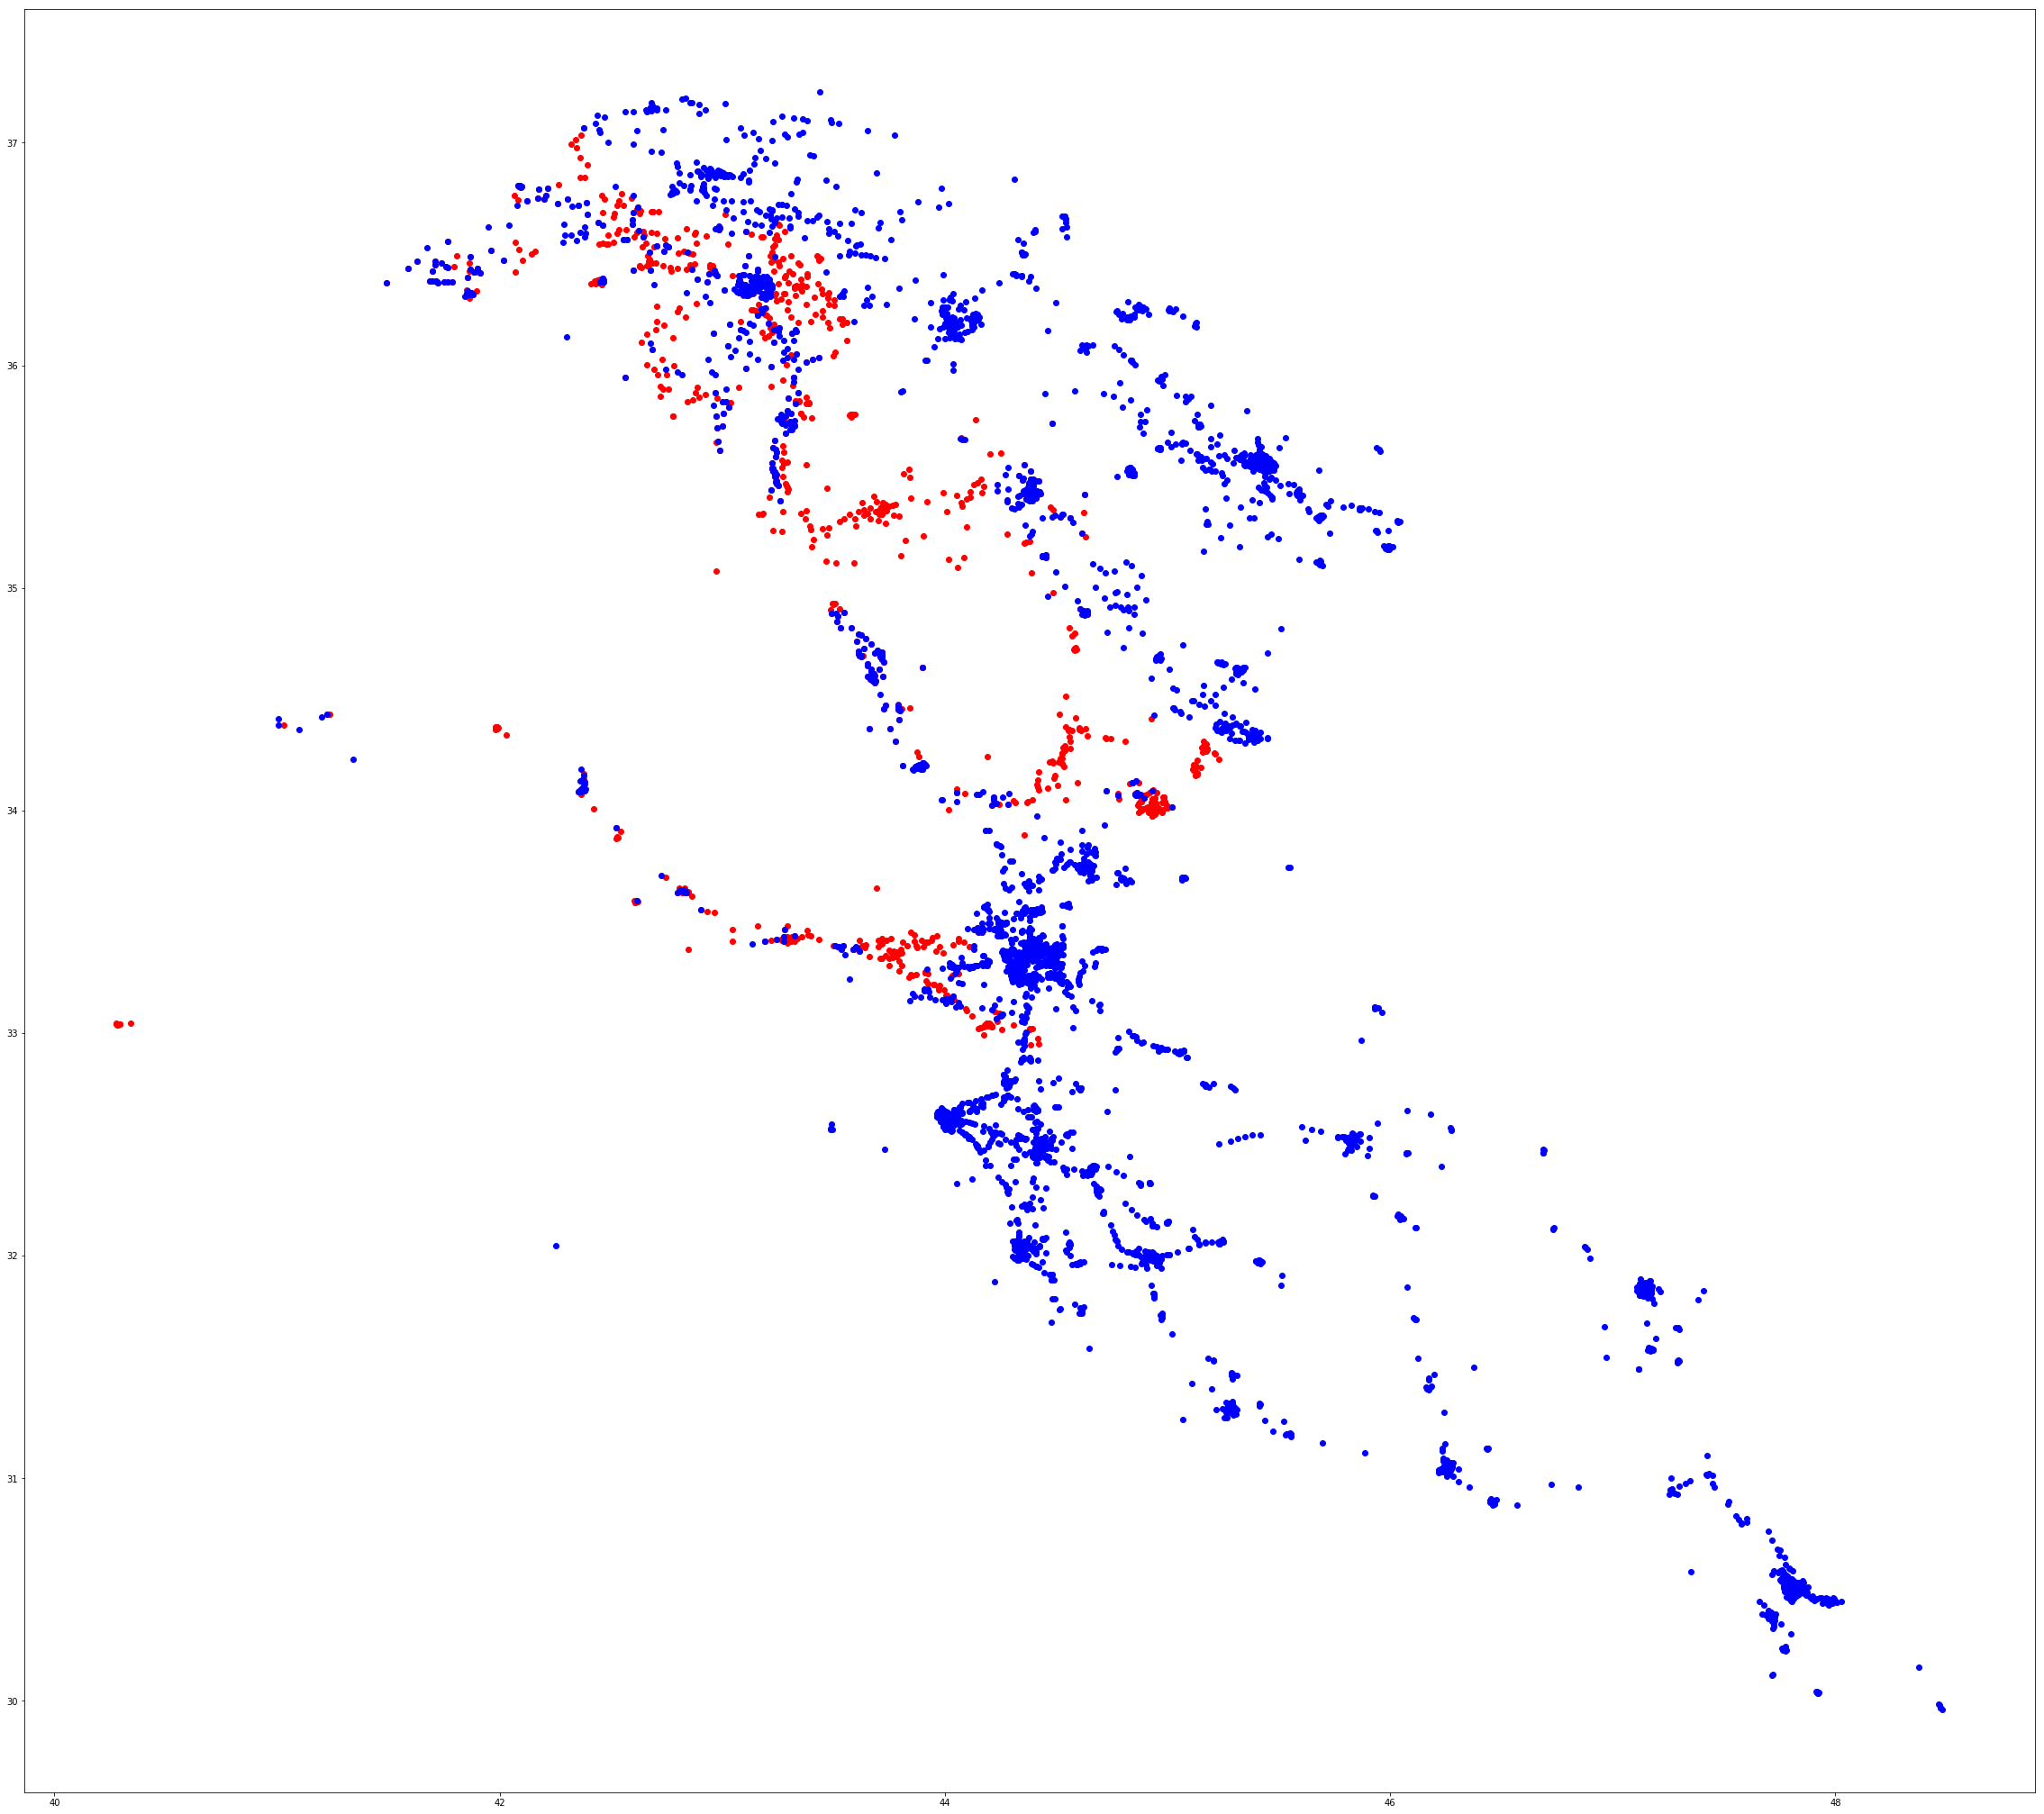

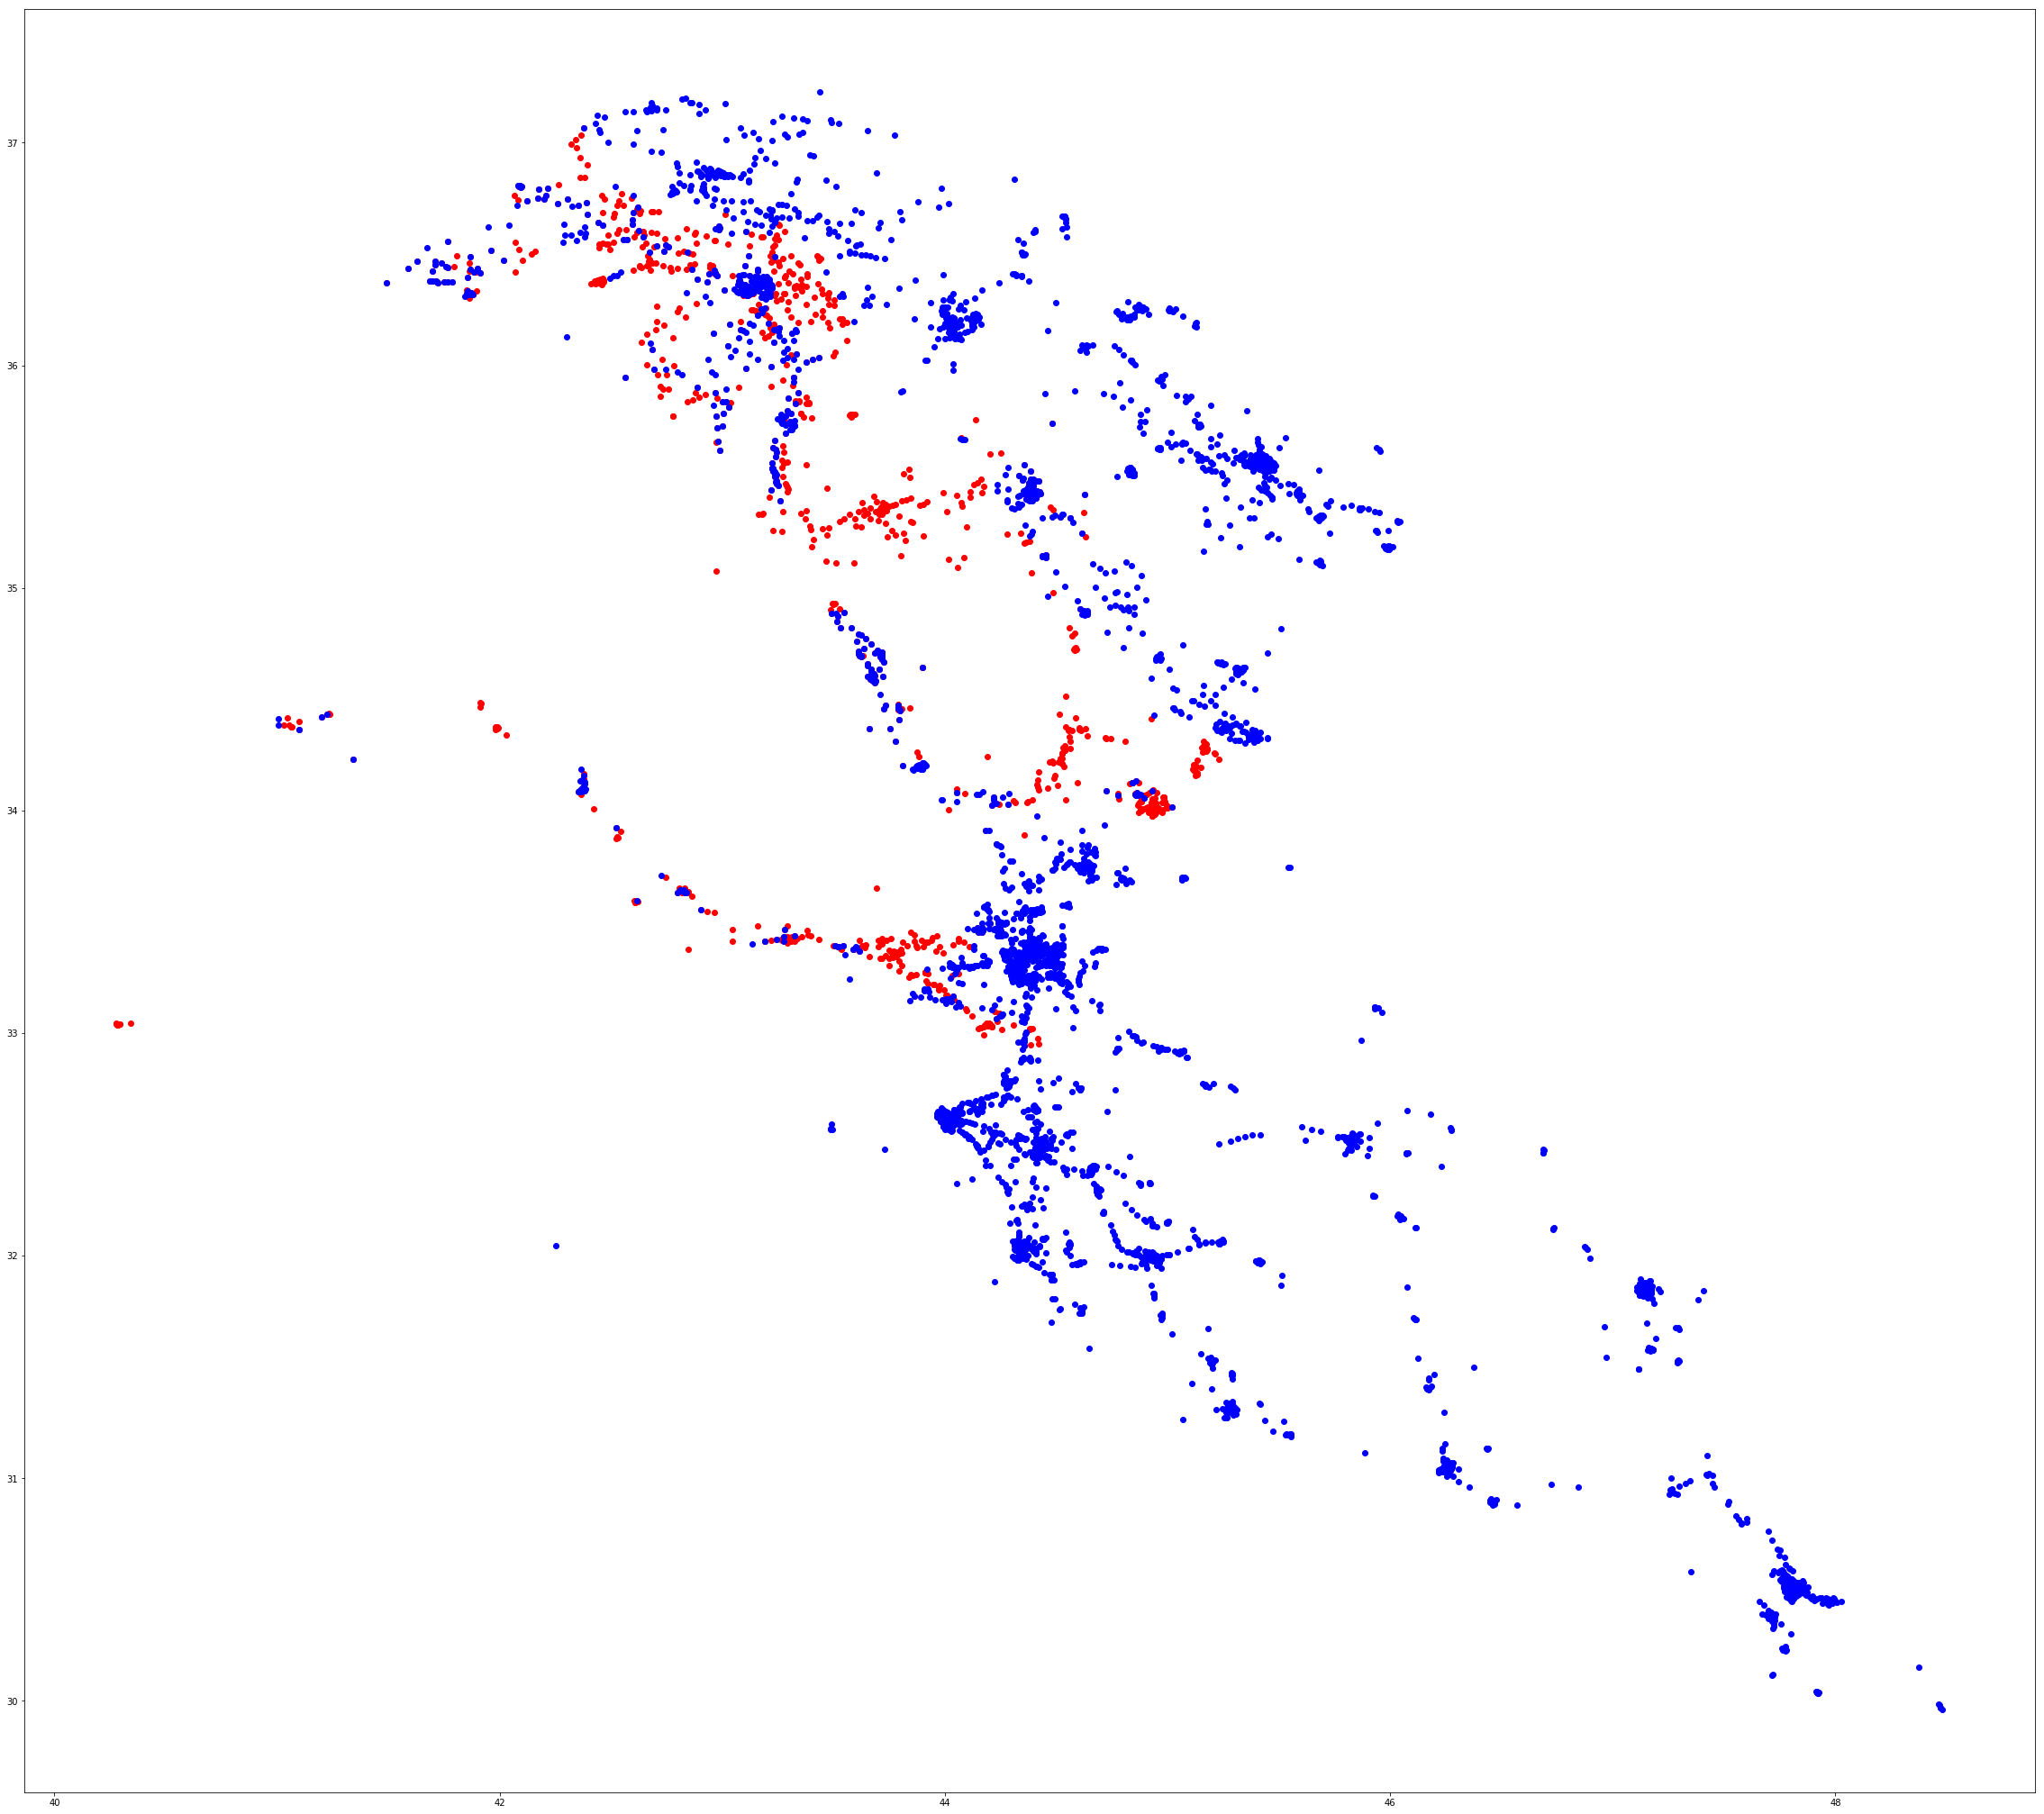

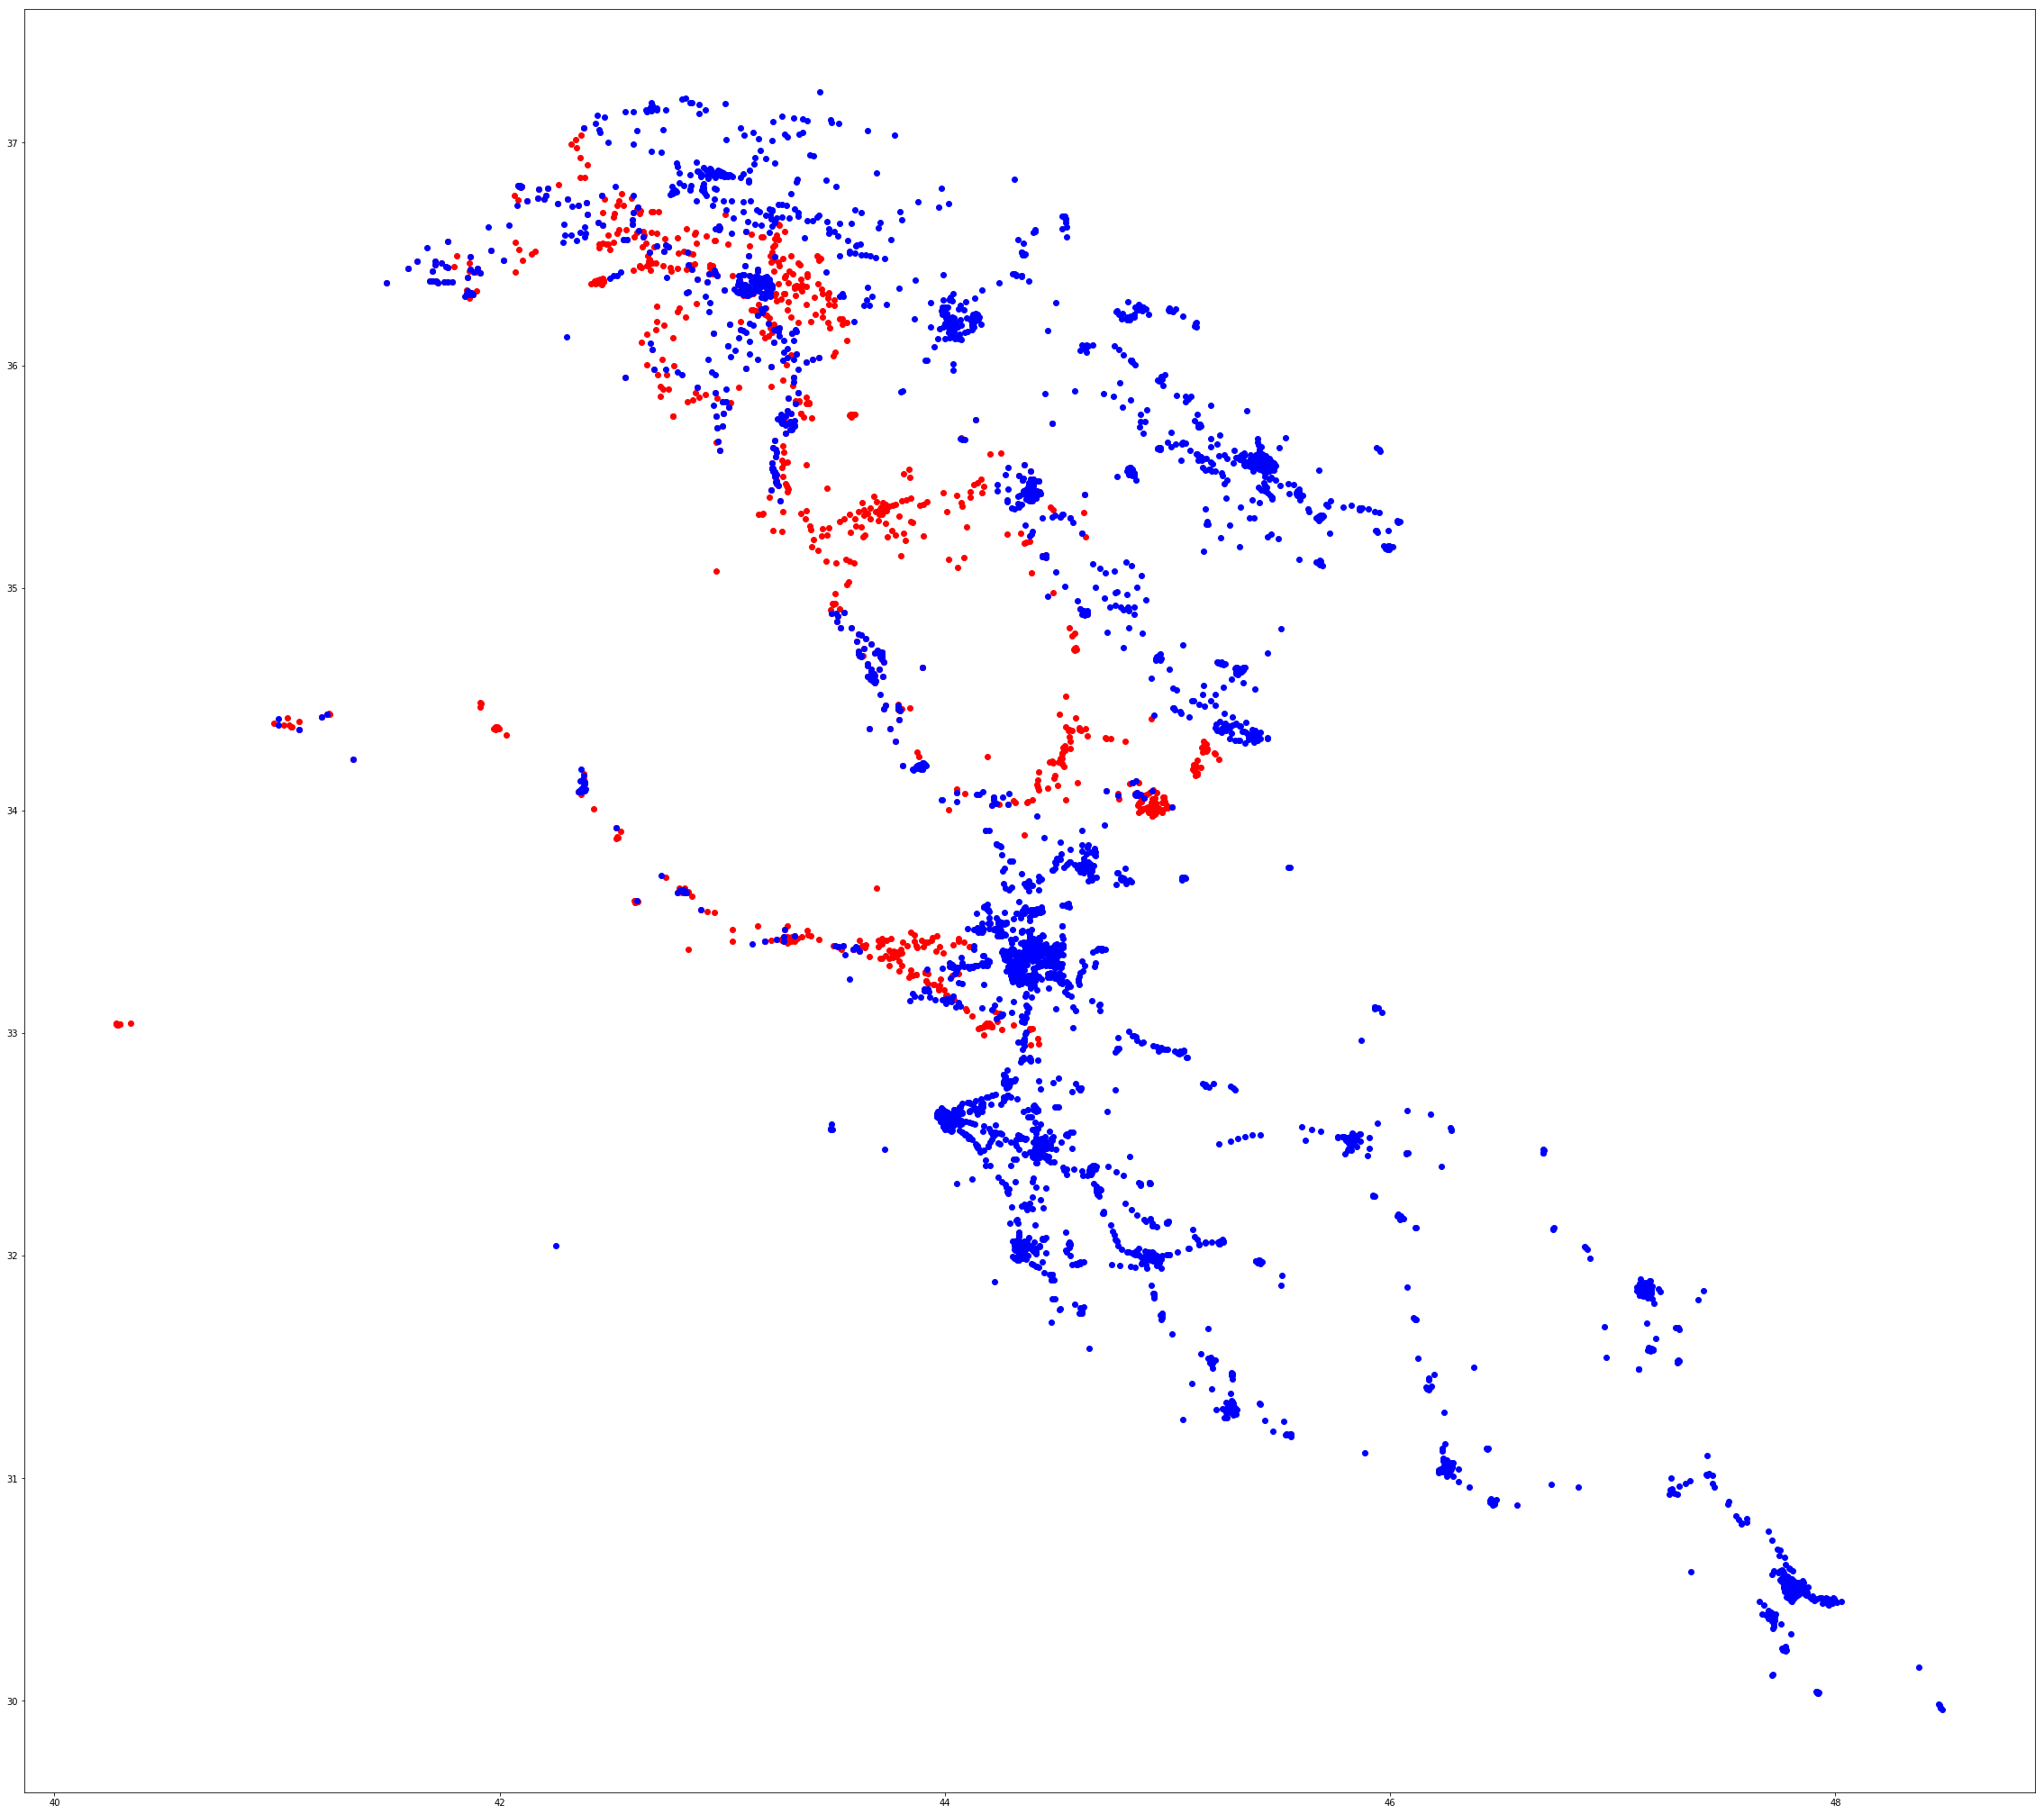

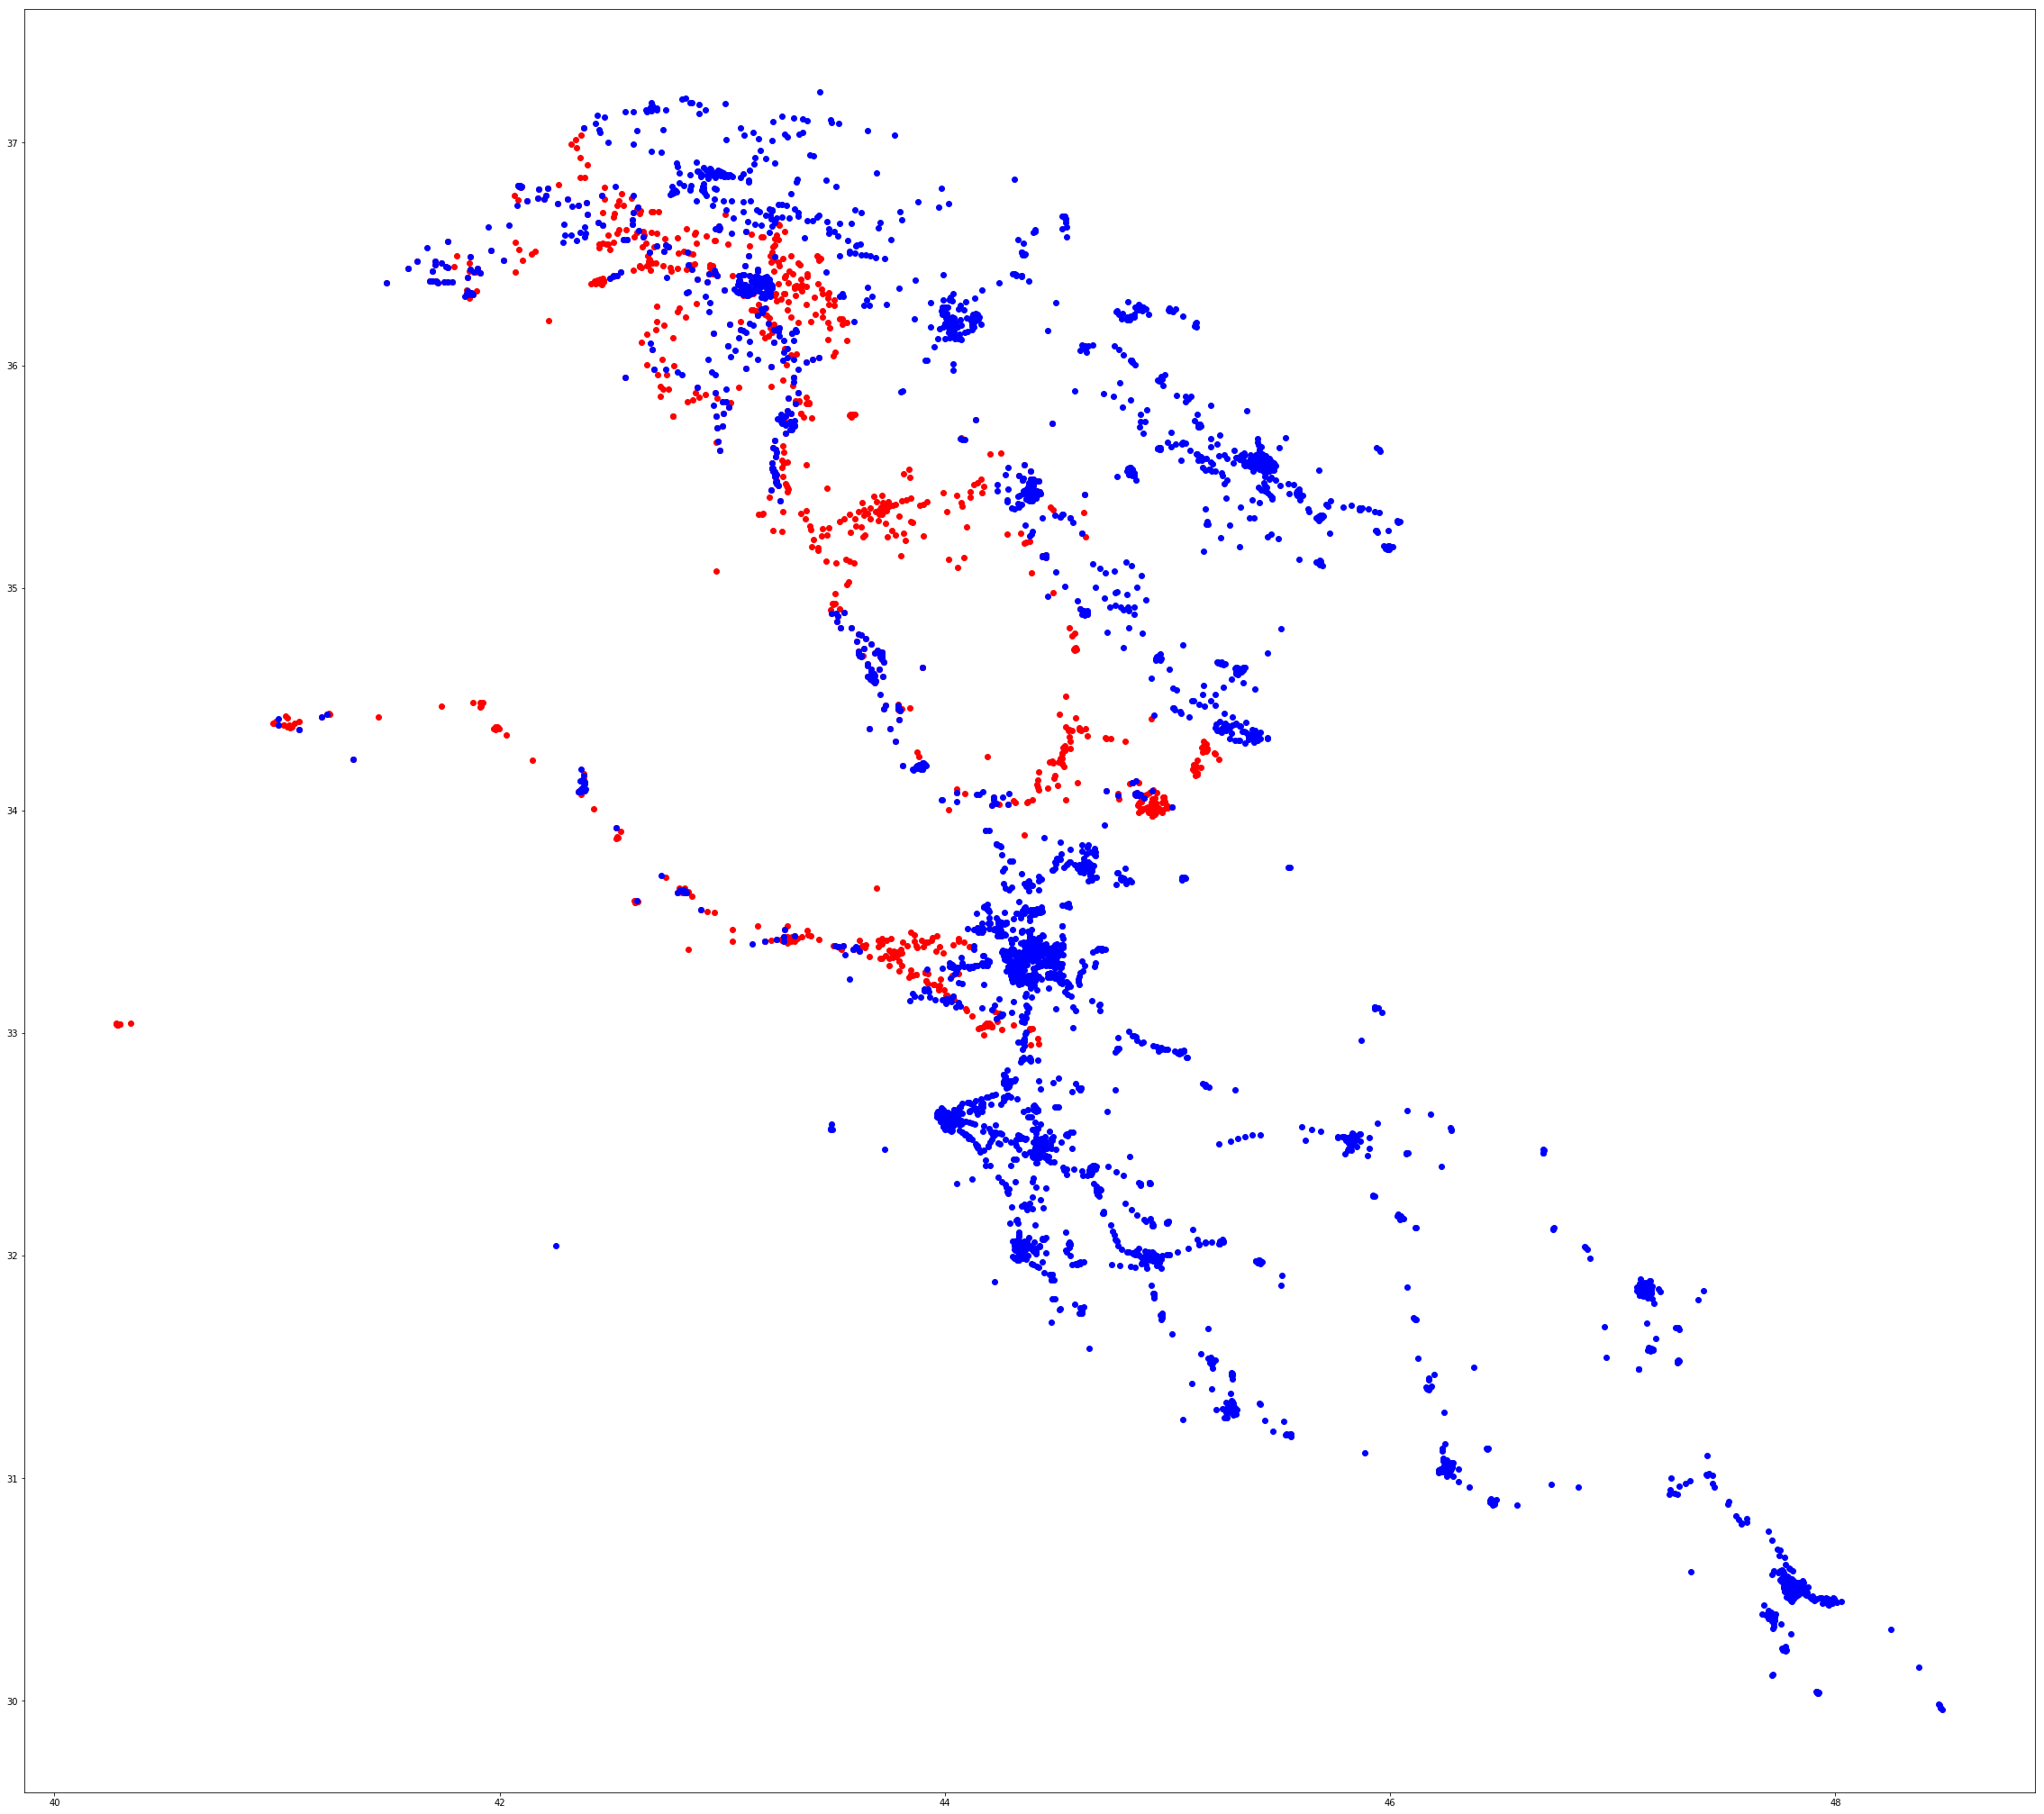

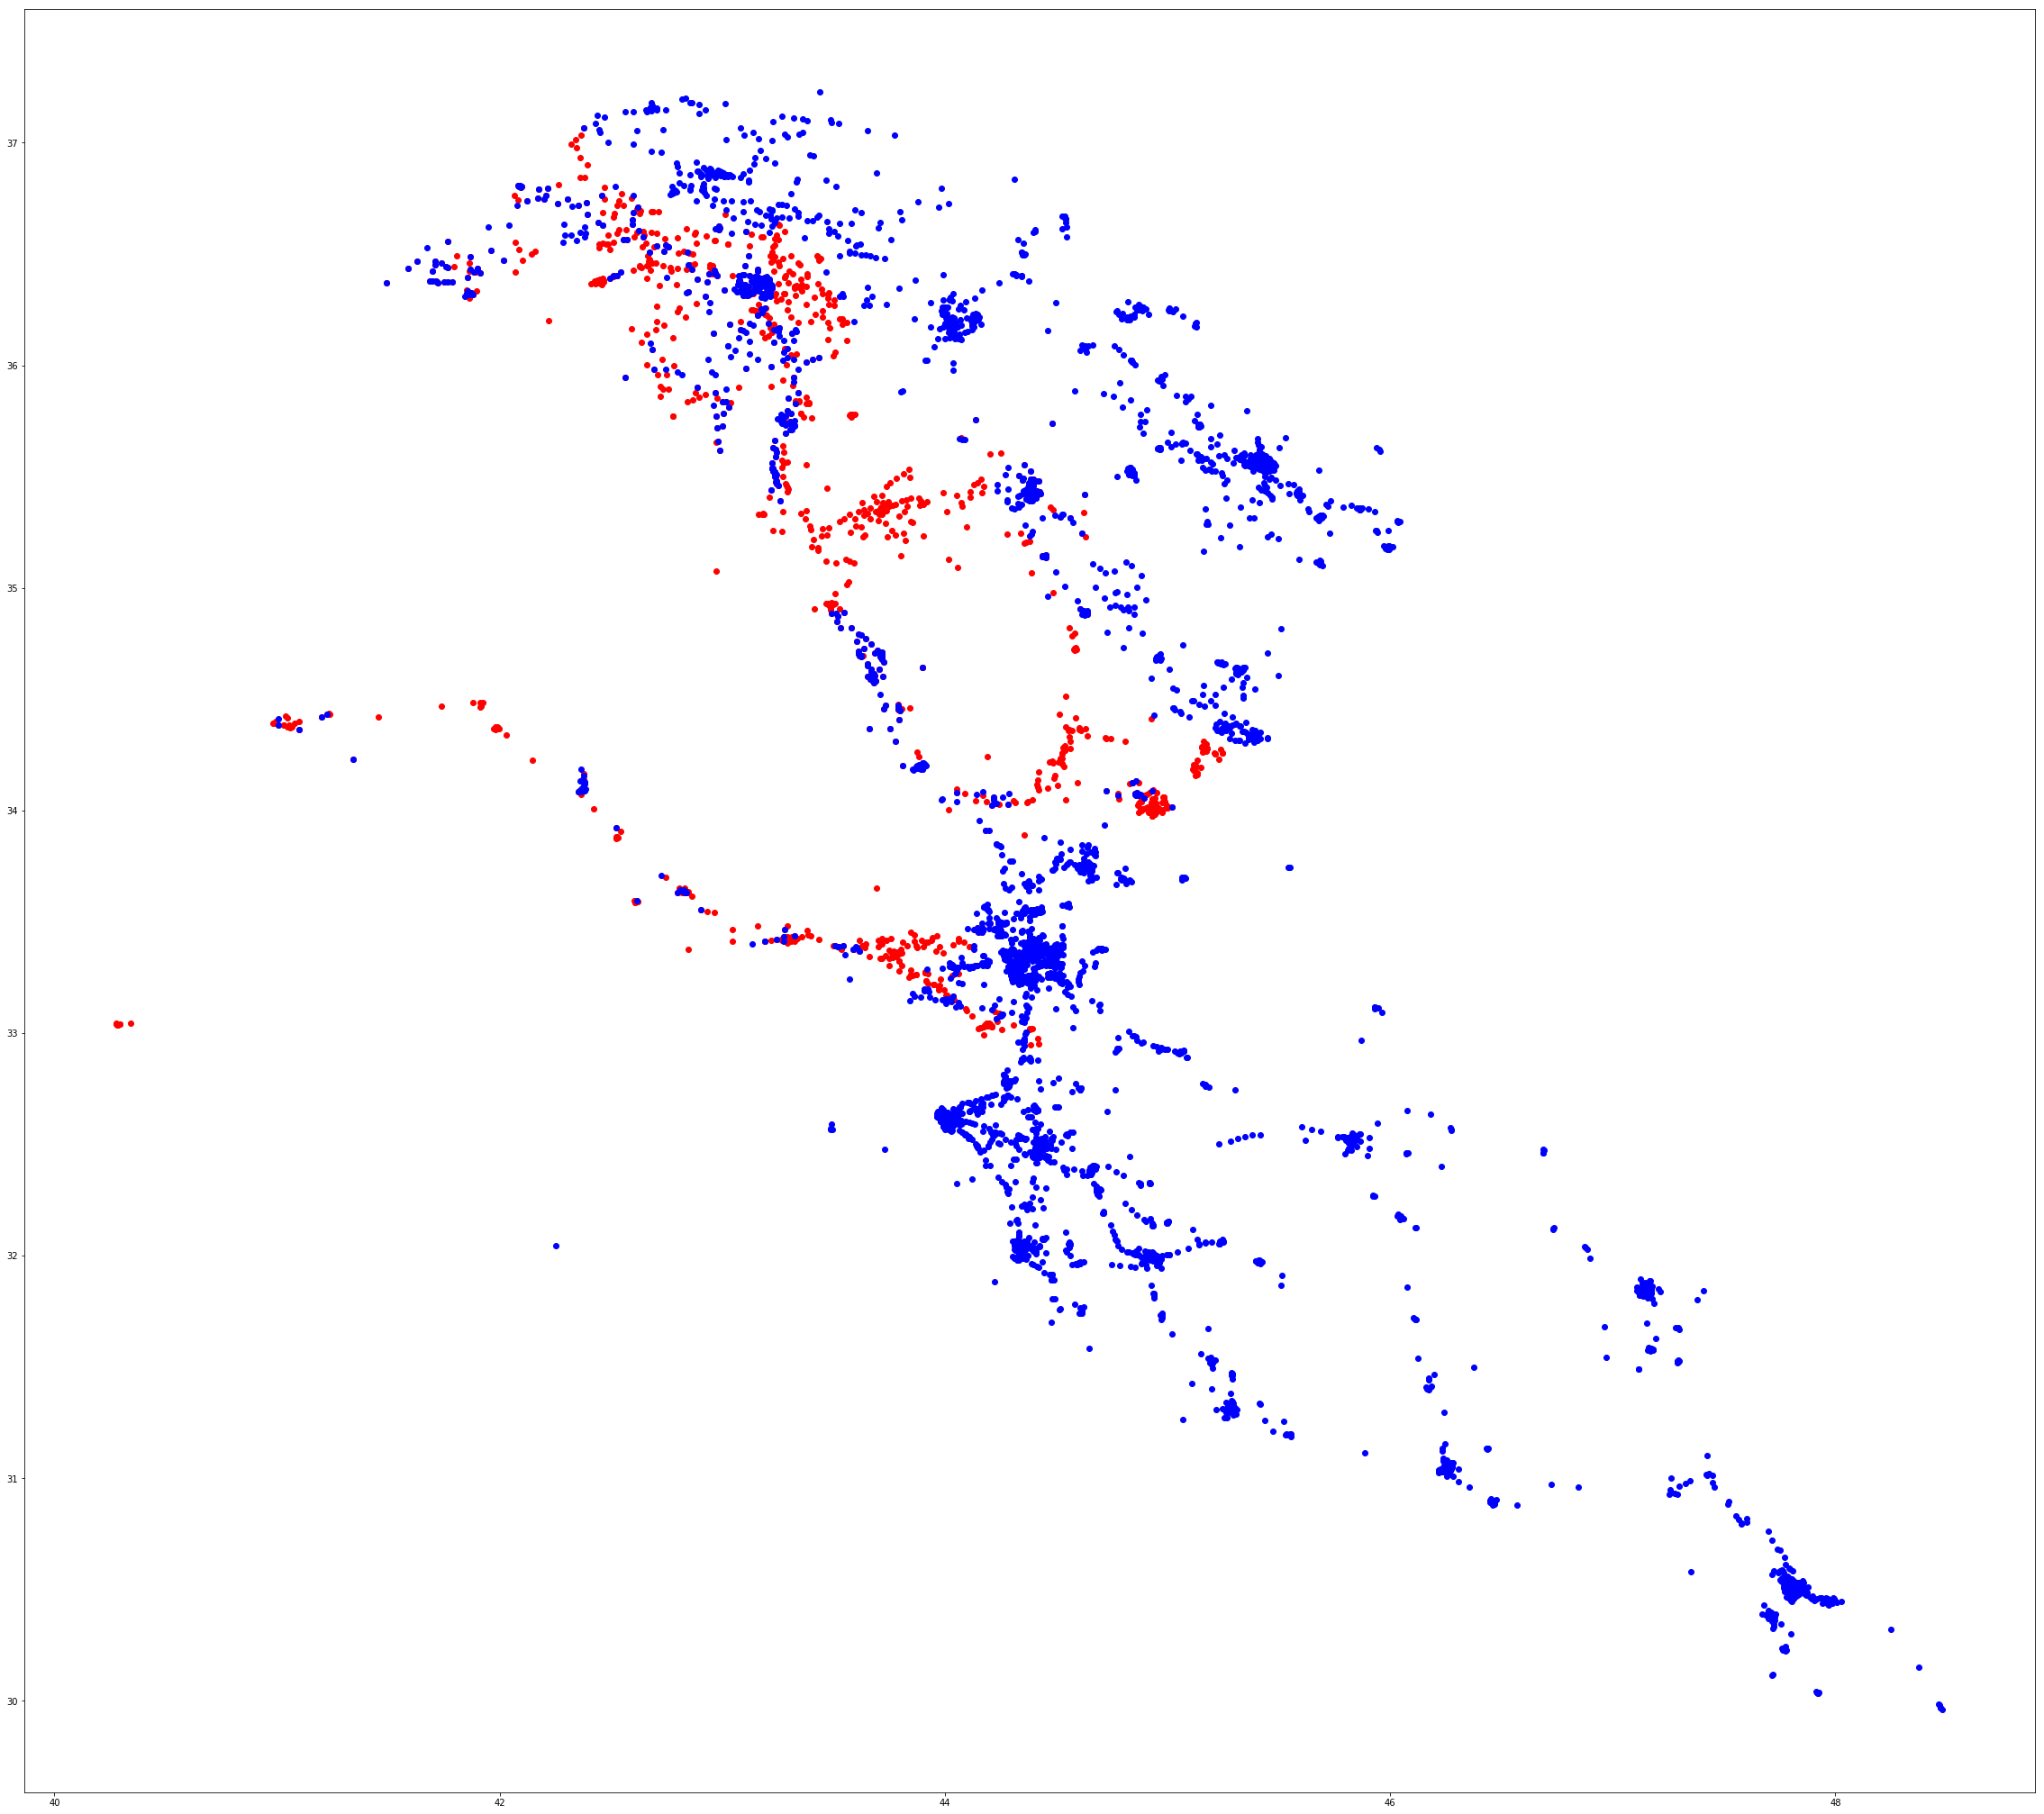

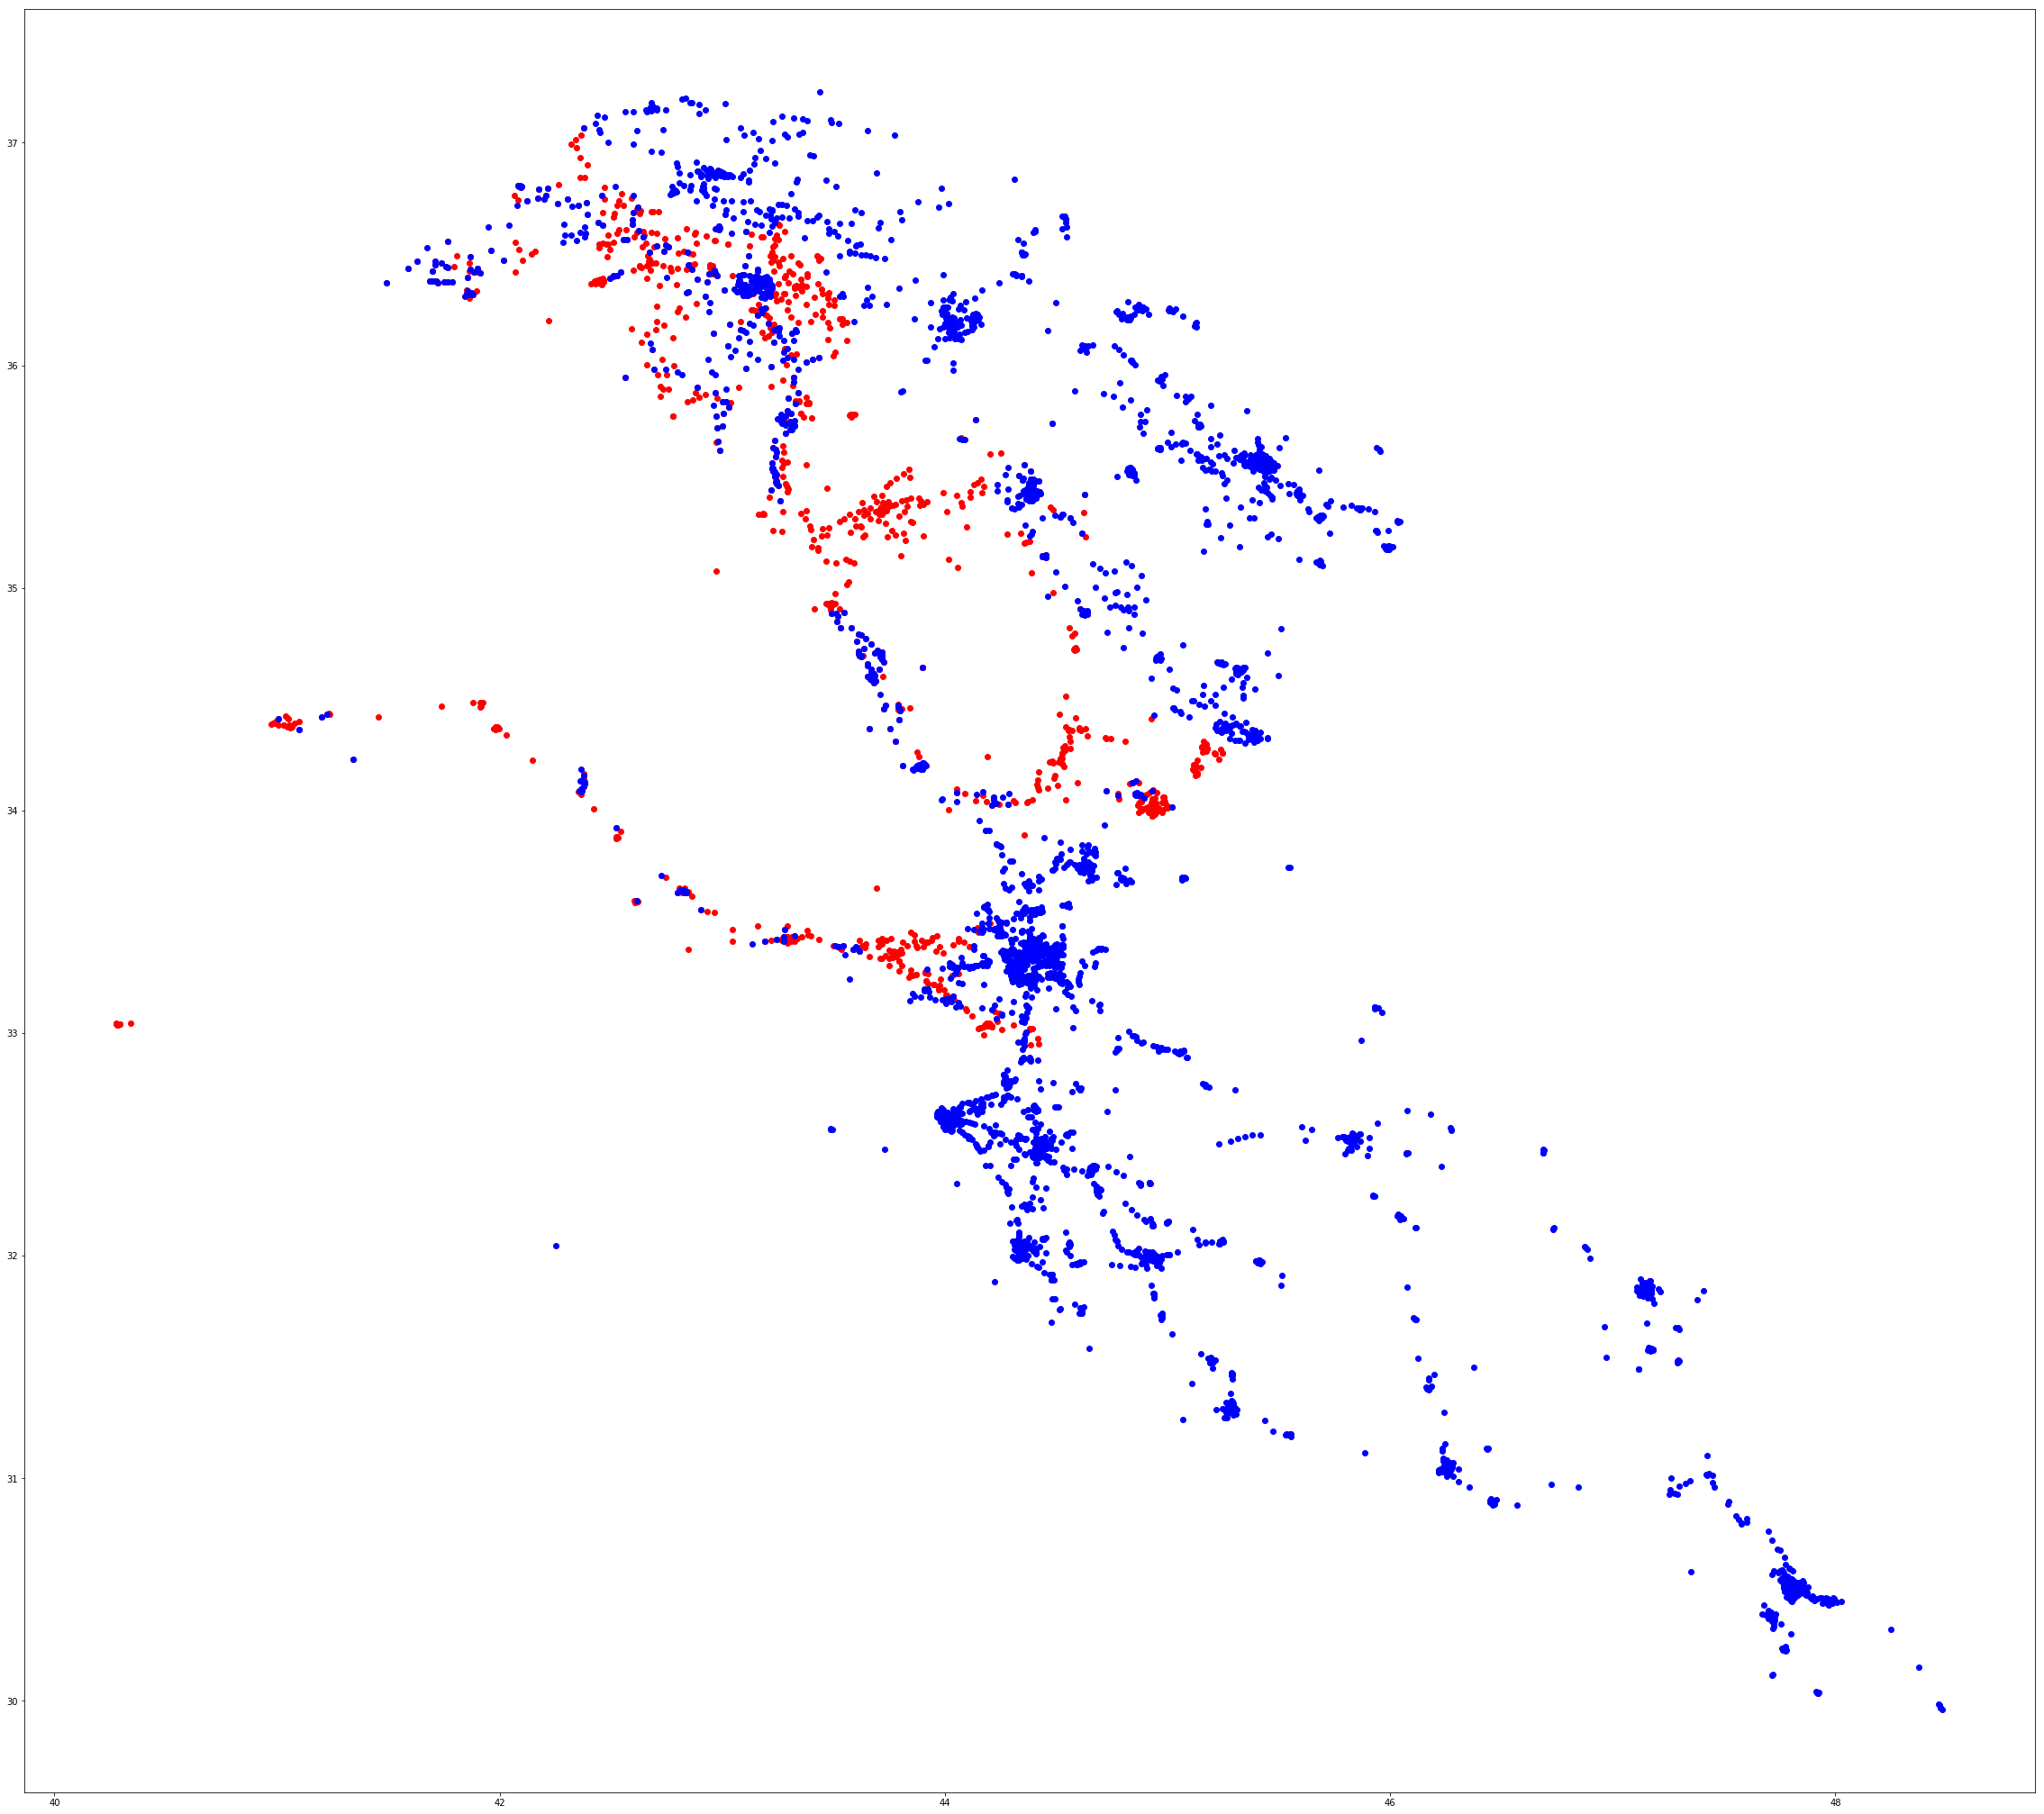

In [457]:
for i in range(84, 92):
    d91 = pd.read_csv("data/iom_dtm_reports/csv/d" + str(i) + ".csv")
    r91 = pd.read_csv("data/iom_dtm_reports/csv/r" + str(i) + ".csv")
    plot_map(d91, r91, str(i))

# Network analysis

import networkx as nx
import osmnx as ox

for i in range(84, 92):
    d = pd.read_csv("data/iom_dtm_reports/csv/d" + str(i) + ".csv")
    r = pd.read_csv("data/iom_dtm_reports/csv/r" + str(i) + ".csv")
    break
#https://en.wikipedia.org/wiki/Districts_of_Iraq#Anbar_Governorate

def make_map_from_osmnx():
    places = ["Anbar, Iraq",
             "Nineweh, Iraq"]
    G = ox.graph_from_file("data/iraq-latest.osm")
    #G = gdf_from_place("Iraq")
    #G = ox.graph_from_place(places, network_type='all', retain_all = True)
    print('got graph')
    #G_projected = ox.project_graph(G)
    print('projected')
    #ox.save_graphml(G_projected, filename= "_".join(places) + '.graphml')
    print('saved graphml')
    #fig, ax = ox.plot_graph(G_projected, show=False, save=True, 
                          #filename="_".join(places), file_format='png')


make_map_from_osmnx()

# Well, that took too long...

# Alternative to network analysis - simulate graph with adjacency matrix

In [458]:
# use scipy sparse matrices

# Getting ACLED DATA

In [459]:
acled_link = "https://data.humdata.org/hxlproxy/data.csv?url=https%3A%2F%2Fapi.acleddata.com%2Facled%2Fread.csv%3Flimit%3D0%26iso%3D368&name=ACLEDHXL&tagger-match-all=on&tagger-02-header=iso&tagger-02-tag=%23country%2Bcode&tagger-03-header=event_id_cnty&tagger-03-tag=%23event%2Bcode&tagger-05-header=event_date&tagger-05-tag=%23date%2Boccurred+&tagger-08-header=event_type&tagger-08-tag=%23event%2Btype&tagger-09-header=actor1&tagger-09-tag=%23group%2Bname%2Bfirst&tagger-10-header=assoc_actor_1&tagger-10-tag=%23group%2Bname%2Bfirst%2Bassoc&tagger-12-header=actor2&tagger-12-tag=%23group%2Bname%2Bsecond&tagger-13-header=assoc_actor_2&tagger-13-tag=%23group%2Bname%2Bsecond%2Bassoc&tagger-16-header=region&tagger-16-tag=%23region%2Bname&tagger-17-header=country&tagger-17-tag=%23country%2Bname&tagger-18-header=admin1&tagger-18-tag=%23adm1%2Bname&tagger-19-header=admin2&tagger-19-tag=%23adm2%2Bname&tagger-20-header=admin3&tagger-20-tag=%23adm3%2Bname&tagger-21-header=location&tagger-21-tag=%23loc%2Bname&tagger-22-header=latitude&tagger-22-tag=%23geo%2Blat&tagger-23-header=longitude&tagger-23-tag=%23geo%2Blon&tagger-25-header=source&tagger-25-tag=%23meta%2Bsource&tagger-27-header=notes&tagger-27-tag=%23description&tagger-28-header=fatalities&tagger-28-tag=%23affected%2Bkilled&header-row=1"
acled = pd.read_csv(acled_link)
acled = acled.loc[1:] # Get rid of HUMDATA tags
iq_dist = gpd.read_file('data/Iraq Districts/iraq_districts.shp')
iq_dist.head()

,OBJECTID,ADM3NAME,ADM3CODE,ADM2NAME,ADM2CODE,AREA_KM2,PERIM_KM,geometry
0,1,Al-Shikhan,iq15053,Ninewa,iq15,1304.477640,185.494463,"POLYGON ((43.31855266299995 36.93143885000006,..."
1,2,Tilkaif,iq15100,Ninewa,iq15,1247.191304,168.651504,"POLYGON ((43.16658700899989 36.78658700400008,..."
2,3,Al-Hamdaniya,iq15017,Ninewa,iq15,1785.729624,220.723098,"POLYGON ((43.38058472199994 36.54517364900005,..."
3,4,Mosul,iq15038,Ninewa,iq15,4335.375726,420.809044,"POLYGON ((42.74877737399935 36.53786930100007,..."
4,5,Telafar,iq15098,Ninewa,iq15,4460.156834,424.953377,"POLYGON ((42.8729421619996 36.71218868700004, ..."


In [460]:
def make_adj_mat(iq_dist):

    def get_adjacencies(district):
        adj_list = iq_dist['geometry'].touches(district)
        bool_transform = lambda x: 1 if x == True else 0
        return [bool_transform(i) for i in adj_list]

    adj_results = []
    num_rows = 0

    for i in iq_dist['geometry']:
        adj_results.append(get_adjacencies(i))
        num_rows += 1

    return np.identity(num_rows) + np.matrix(adj_results) # because all polgyons are self-adjacent

adj_mat = make_adj_mat(iq_dist)

In [461]:

def random_walker(adj_matrix, start, walk, remaining_length):
    # ref https://medium.com/@sddkal/random-walks-on-adjacency-matrices-a127446a6777
    # ref discussion with reid
    
    if remaining_length == 0:
        return walk
    else:
        indexer = len(walk) % 2
        if indexer == 0:
            selection = adj_matrix[start, :]  # hold row constant
        else:
            selection = adj_matrix[:, start]  # hold col constant
        
        indices = np.arange(max(selection.shape))
        
        # the probabilities should be the actual values of the matrix
        prob = [i for i in selection.flat] / sum([i for i in selection.flat])

        end = choice(indices, p = prob) # probs must be 1-d
            
        walk.append((start, end))  # NOT indices - trip information
              
        walk =  random_walker(adj_matrix, end, walk, remaining_length - 1)
        
        return walk
        


In [462]:


def make_walk(adj_mat, start, num_steps, places):
    walk_record = random_walker(adj_mat, start, [], num_steps)
    return [(places[i], places[j]) for i, j in walk_record]


In [463]:
acled.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
1,723718.0,368,IRQ6029,6029.0,2018-03-24,2018.0,1.0,Battle-No change of territory,Islamic State (Iraq),NaN,...,Kirkuk,35.4681,44.3922,3.0,Anadolu Agency (AA),Regional,"On Mar 24, at least eight police officers were...",8,1.522102e+09,IRQ
2,723747.0,368,IRQ6030,6030.0,2018-03-24,2018.0,1.0,Remote violence,Unidentified Armed Group (Iraq),NaN,...,Sharwain,34.0552,44.8879,1.0,National Iraqi News Agency (NINA),National,"On Mar 24, a member of the TMF was killed and ...",1,1.522102e+09,IRQ
3,723717.0,368,IRQ6028,6028.0,2018-03-23,2018.0,1.0,Battle-No change of territory,Islamic State (Iraq),NaN,...,Nahiyat ar Riyad,35.269,43.9108,1.0,Amaq (Telegram messaging application in Arabic),Other-Local,"On Mar 23, IS militants destroyed 4 PMF vehicl...",0,1.522102e+09,IRQ
4,723743.0,368,IRQ6019,6019.0,2018-03-23,2018.0,1.0,Remote violence,Unidentified Armed Group (Iraq),NaN,...,An Nada,33.8625,45.2874,1.0,Anadolu Agency (AA),Regional,"On Mar 23, at least four Iraqi soldiers were k...",4,1.522102e+09,IRQ
5,723744.0,368,IRQ6022,6022.0,2018-03-23,2018.0,1.0,Remote violence,Islamic State (Iraq),NaN,...,Kirkuk,35.4681,44.3922,1.0,Sotaliraq,National,"On Mar 23, an IED planted roadside, suspected ...",0,1.522102e+09,IRQ


# Try simulation with equal probs

In [465]:
point_list = []
#acled = acled[acled['']]
for i in acled.itertuples():
    point_list.append(Point(float(i.longitude), float(i.latitude)))
acled['geometry'] = point_list
acled_geo = gpd.GeoDataFrame(acled)

adj_mat = make_adj_mat(iq_dist)

result_list = []
for i in acled_geo.itertuples():
    check = iq_dist['geometry'].contains(i.geometry)
    result_list.append(iq_dist.loc[check])

places = dict(iq_dist['ADM3NAME'])


In [ ]:
walks = []
for i in result_list:
    val = i["OBJECTID"].values
    if len(val) == 1:
        walks.append(make_walk(adj_mat, val[0] - 1 , 1000, places))

In [ ]:
iq_dist.head()

In [ ]:
G=nx.Graph()
ctr = iq_dist['geometry'].centroid
loc_list = []

for i in iq_dist.itertuples():
    place = i.ADM3NAME
    ctr = i.geometry.centroid
    G.add_node(place, pos = (ctr.x, ctr.y))

#for i in ctr:
  #  loc_list.append((i.x, i.y))
    
    #G.add_node(place.ADM3NAME, pos = )
#G.add_nodes_from(places.values())
for walk in walks:
    G.add_edges_from(walk)

In [ ]:
nx.draw(G, node_size = 6)
plt.show()